In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Datasets

In [4]:
data1= pd.read_csv('/kaggle/input/online-payments-fraud-detection-dataset/PS_20174392719_1491204439457_log.csv')
data2= pd.read_csv('/kaggle/input/online-shop-customer-sales-data/Online Shop Customer Sales Data.csv')#Adding this data to make it more comprehensive.

# Creating a new dataset for this project

In [5]:
data1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
#filter out customers who are  below 18years old for a realistic online payment platform project
data2= data2[data2['Age'] >= 18]
data2.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [7]:
columns= data2[['Customer_id', 'Age', 'Gender', 'Pay_Method', 'N_Purchases', 'Purchase_DATE', 'Browser','Time_Spent','Newsletter']]

In [8]:
data= pd.concat([columns, data1], axis=1)
data= data.drop(['step', 'isFlaggedFraud'], axis=1)
data.rename(columns={'N_Purchases': 'N_Transactions', 'Purchase_DATE': 'Transaction_DATE'}, inplace=True)

data

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Transaction_DATE,Browser,Time_Spent,Newsletter,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,504308.0,53.0,0.0,1.0,2.0,22.06.21,0.0,885.0,0.0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,504309.0,18.0,1.0,2.0,3.0,10.12.21,0.0,656.0,0.0,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,504310.0,52.0,1.0,0.0,1.0,14.03.21,0.0,761.0,1.0,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,504311.0,29.0,0.0,1.0,5.0,25.10.21,0.0,906.0,1.0,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,504312.0,21.0,1.0,1.0,1.0,14.09.21,0.0,605.0,1.0,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


# Dataset Information

### Customer_id = unique customer id
### Age = customer's age
### Gender = 0: Male, 1: Female
### N_Transactions = number of transactions to date
### Transaction_DATE = date latest transactions, dd.mm.yy
### Pay_Method = 0: Digital Wallets, 1: Card, 2: PayPal, 3: Other
### Time_Spent = time spent (in sec) on website
### Browser = 0:mobile app, 1: chrome, 2: google , 3: Other
### Newsletter = 0: not subscribed, 1: subscribed
### type: type of online transaction
### amount: the amount of the transaction
### nameOrig: customer starting the transaction
### oldbalanceOrg: balance before the transaction
### newbalanceOrig: balance after the transaction
### nameDest: recipient of the transaction
### oldbalanceDest: initial balance of recipient before the transaction
### newbalanceDest: the new balance of recipient after the transaction
### isFraud: fraud transaction

# EDA

In [9]:
last_non_nan_index= data['Customer_id'].last_valid_index() #Get the index of the last non-NaN value
last_non_nan_value= int(data.loc[last_non_nan_index, 'Customer_id']) #Get the actual value of the last non-NaN value

nan_indices= data[data['Customer_id'].isna()].index #Get the indices of NaN values
sequence= range(last_non_nan_value + 1, last_non_nan_value + len(nan_indices) + 1) #Create the sequence

data.loc[nan_indices, 'Customer_id'] = sequence # Assign the sequence to NaN values
data

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Transaction_DATE,Browser,Time_Spent,Newsletter,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,504308.0,53.0,0.0,1.0,2.0,22.06.21,0.0,885.0,0.0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,504309.0,18.0,1.0,2.0,3.0,10.12.21,0.0,656.0,0.0,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,504310.0,52.0,1.0,0.0,1.0,14.03.21,0.0,761.0,1.0,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,504311.0,29.0,0.0,1.0,5.0,25.10.21,0.0,906.0,1.0,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,504312.0,21.0,1.0,1.0,1.0,14.09.21,0.0,605.0,1.0,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,6869620.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,6869621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,6869622.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,6869623.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [10]:
data2

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65791,570099,30,1,10.9,4,15.02.21,6.213,1,894,0,0,0
65792,570100,33,0,29.3,1,05.02.21,29.300,0,722,0,0,0
65793,570101,50,0,25.4,5,29.10.21,23.114,3,424,0,0,0
65794,570102,56,0,29.2,1,09.12.21,29.200,3,731,0,0,0


In [11]:
#displaying the first 64001 rows 
#in data2 which has the last customer id as '570103', after running the code that gave customer id to those without id
#the data displays the first 64001 rows which shows two of the newly added customer_id which is "571004" and "571005"
data.head(64001)

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Transaction_DATE,Browser,Time_Spent,Newsletter,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,504308.0,53.0,0.0,1.0,2.0,22.06.21,0.0,885.0,0.0,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,504309.0,18.0,1.0,2.0,3.0,10.12.21,0.0,656.0,0.0,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,504310.0,52.0,1.0,0.0,1.0,14.03.21,0.0,761.0,1.0,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,504311.0,29.0,0.0,1.0,5.0,25.10.21,0.0,906.0,1.0,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,504312.0,21.0,1.0,1.0,1.0,14.09.21,0.0,605.0,1.0,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22084,571001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH_OUT,218152.62,C1378626073,111996.06,0.00,C1261031890,22468.56,92853.91,0
22126,571002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CASH_IN,91587.77,C1765168837,4577269.00,4668856.77,C935808590,17798608.29,18381668.73,0
22149,571003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAYMENT,8807.09,C1627887210,24798.58,15991.49,M2123522237,0.00,0.00,0
22171,571004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PAYMENT,19741.44,C1972297198,0.00,0.00,M1623428164,0.00,0.00,0


In [12]:
#checking for missing values, False means no missing value and True missing the numbers of missing values
missing_values= data.isnull()
for column in missing_values.columns.values.tolist():
    print(missing_values[column].value_counts())
    print(" ")

Customer_id

False    6362620

Name: count, dtype: int64

 

Age

True     6299521

False      63099

Name: count, dtype: int64

 

Gender

True     6299521

False      63099

Name: count, dtype: int64

 

Pay_Method

True     6299521

False      63099

Name: count, dtype: int64

 

N_Transactions

True     6299521

False      63099

Name: count, dtype: int64

 

Transaction_DATE

True     6299521

False      63099

Name: count, dtype: int64

 

Browser

True     6299521

False      63099

Name: count, dtype: int64

 

Time_Spent

True     6299521

False      63099

Name: count, dtype: int64

 

Newsletter

True     6299521

False      63099

Name: count, dtype: int64

 

type

False    6362620

Name: count, dtype: int64

 

amount

False    6362620

Name: count, dtype: int64

 

nameOrig

False    6362620

Name: count, dtype: int64

 

oldbalanceOrg

False    6362620

Name: count, dtype: int64

 

newbalanceOrig

False    6362620

Name: count, dtype: int64

 

nameDest

False    63626

In [13]:
miss= data[['Age', 'Gender', 'Pay_Method', 'N_Transactions', 'Transaction_DATE', 'Browser','Time_Spent','Newsletter']]

In [14]:
median_age= round(data['Age'].median())#calculating the Median value of age
print('Median age is', median_age)

highest_genfreq= data['Gender'].value_counts().idxmax() #calculate the mode(highest frequency) of gender
print('The most frequent number in Gender is', highest_genfreq)

highest_payfreq= data['Pay_Method'].value_counts().idxmax() #calculate the mode(highest frequency) of Pay method

print('The most frequent number in Pay_Method is', highest_payfreq)

median_npurchase= round(data['N_Transactions'].median())
print('Median number of Transactions', median_npurchase)

highest_browsfreq= data['Browser'].value_counts().idxmax() #calculate the mode(highest frequency) of Browser

print('The most frequent number in Browser is', highest_browsfreq)

median_timespent= round(data['Time_Spent'].median())
print('Median number of time spent', median_timespent)

highest_newfreq= data['Newsletter'].value_counts().idxmax()#calculate the mode(highest frequency) of Newsletter
print('The most frequent number in Newsletter is', highest_newfreq)

Median age is 41

The most frequent number in Gender is 1.0

The most frequent number in Pay_Method is 1.0

Median number of Transactions 4

The most frequent number in Browser is 0.0

Median number of time spent 599

The most frequent number in Newsletter is 0.0


In [15]:
data['Transaction_DATE'] = pd.to_datetime(data['Transaction_DATE'], format='%d.%m.%y')

median_timestamp= data['Transaction_DATE'].median()
print('Average Transaction date:', median_timestamp)

Average Transaction date: 2021-07-03 00:00:00


In [16]:
import warnings
warnings.filterwarnings('ignore') #ignoring warnings
##replacing missing values by their mode or median value
data['Age'].replace(np.nan, median_age, inplace=True)
data['Gender'].replace(np.nan, highest_genfreq, inplace=True)
data['Pay_Method'].replace(np.nan, highest_payfreq, inplace=True)
data['N_Transactions'].replace(np.nan, median_npurchase, inplace=True)
data['Browser'].replace(np.nan, highest_browsfreq, inplace=True)
data['Time_Spent'].replace(np.nan, median_timespent, inplace=True)
data['Newsletter'].replace(np.nan, highest_newfreq, inplace=True)
data['Transaction_DATE'].replace(np.nan, median_timestamp, inplace=True)

In [17]:
data['Transaction_DATE'] = pd.to_datetime(data['Transaction_DATE'])
data['Transaction_DATE']= data['Transaction_DATE'].dt.strftime('%d-%m-%Y')

In [18]:
#checking if the missing values has being filled, False means no missing value and True missing the numbers of missing values
missing_values= data.isnull()
for column in missing_values.columns.values.tolist():
    print(missing_values[column].value_counts())
    print(" ")

Customer_id

False    6362620

Name: count, dtype: int64

 

Age

False    6362620

Name: count, dtype: int64

 

Gender

False    6362620

Name: count, dtype: int64

 

Pay_Method

False    6362620

Name: count, dtype: int64

 

N_Transactions

False    6362620

Name: count, dtype: int64

 

Transaction_DATE

False    6362620

Name: count, dtype: int64

 

Browser

False    6362620

Name: count, dtype: int64

 

Time_Spent

False    6362620

Name: count, dtype: int64

 

Newsletter

False    6362620

Name: count, dtype: int64

 

type

False    6362620

Name: count, dtype: int64

 

amount

False    6362620

Name: count, dtype: int64

 

nameOrig

False    6362620

Name: count, dtype: int64

 

oldbalanceOrg

False    6362620

Name: count, dtype: int64

 

newbalanceOrig

False    6362620

Name: count, dtype: int64

 

nameDest

False    6362620

Name: count, dtype: int64

 

oldbalanceDest

False    6362620

Name: count, dtype: int64

 

newbalanceDest

False    6362620

Name: count,

In [19]:
data.head()

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Transaction_DATE,Browser,Time_Spent,Newsletter,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,504308.0,53.0,0.0,1.0,2.0,22-06-2021,0.0,885.0,0.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,504309.0,18.0,1.0,2.0,3.0,10-12-2021,0.0,656.0,0.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,504310.0,52.0,1.0,0.0,1.0,14-03-2021,0.0,761.0,1.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,504311.0,29.0,0.0,1.0,5.0,25-10-2021,0.0,906.0,1.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,504312.0,21.0,1.0,1.0,1.0,14-09-2021,0.0,605.0,1.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [20]:
data.describe()
#statistics summary on the data

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Browser,Time_Spent,Newsletter,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,3.688301e+06,4.099583e+01,9.967363e-01,1.003065e+00,3.999959e+00,6.265029e-03,5.990019e+02,1.497025e-03,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.836753e+06,1.320082e+00,5.703594e-02,1.120025e-01,1.996910e-01,1.173959e-01,2.766566e+01,3.866244e-02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,5.043080e+05,1.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.097660e+06,4.100000e+01,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,5.990000e+02,0.000000e+00,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.688314e+06,4.100000e+01,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,5.990000e+02,0.000000e+00,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,5.278969e+06,4.100000e+01,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,5.990000e+02,0.000000e+00,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,6.869624e+06,6.300000e+01,1.000000e+00,3.000000e+00,7.000000e+00,3.000000e+00,1.080000e+03,1.000000e+00,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [21]:
import seaborn as sns

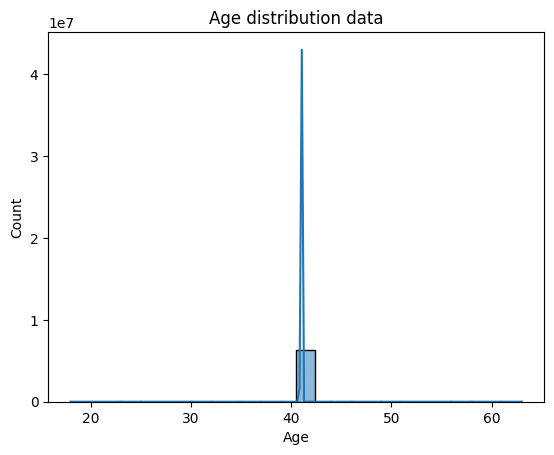

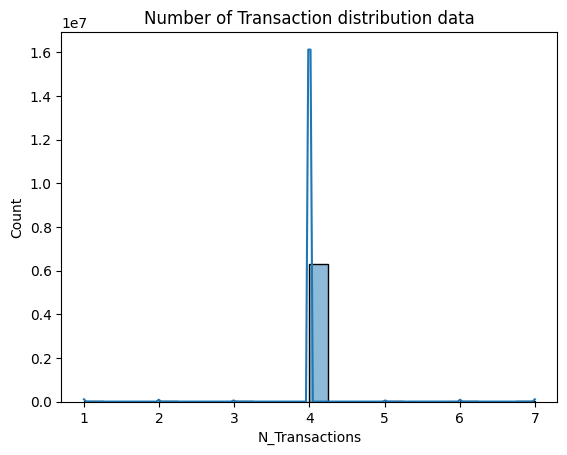

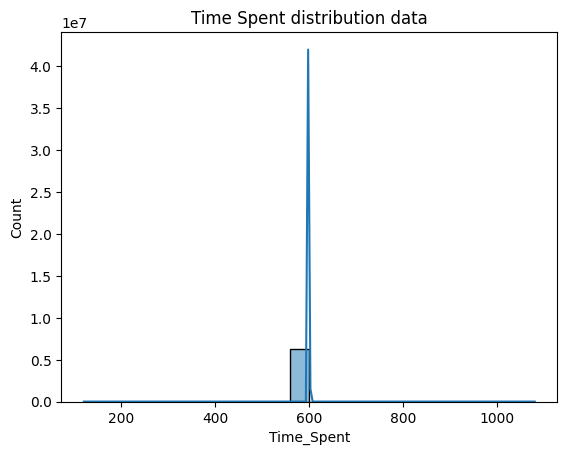

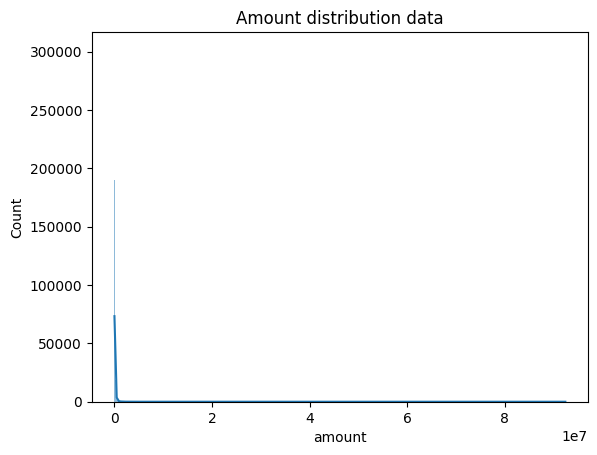

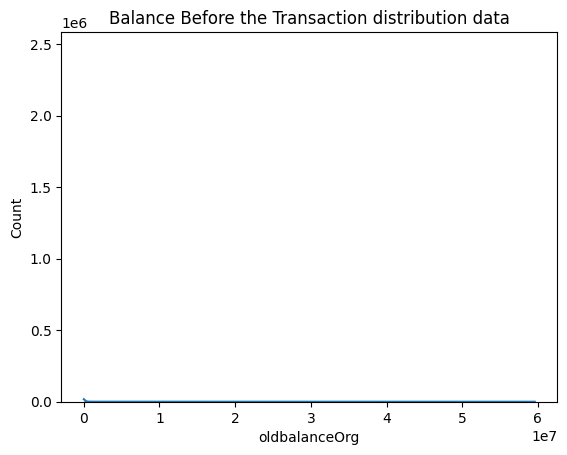

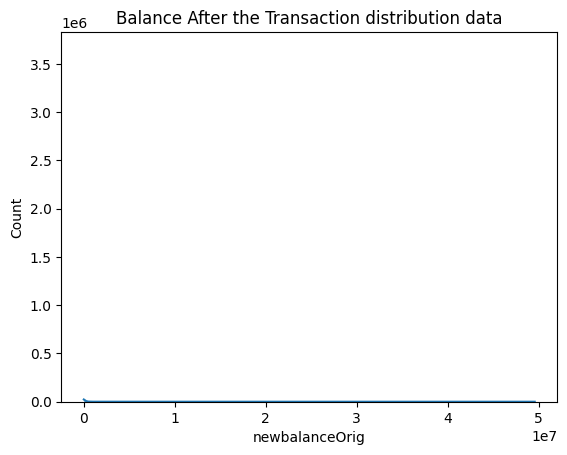

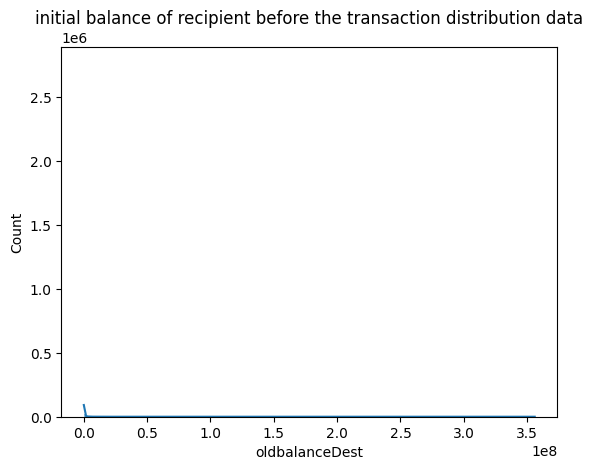

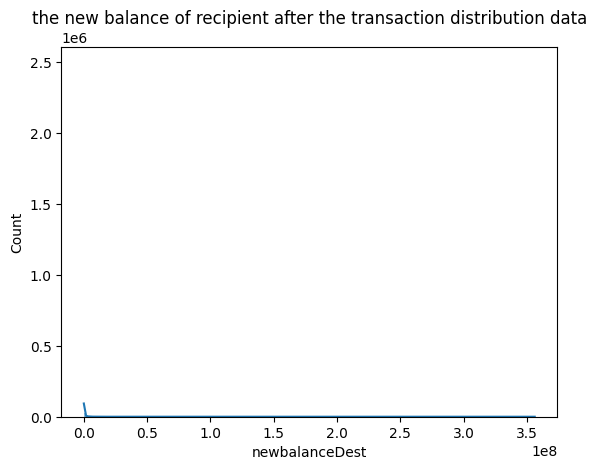

In [22]:
sns.histplot(x='Age', data=data, kde=True)
plt.title('Age distribution data')
plt.show()

sns.histplot(x='N_Transactions', data=data, kde=True)
plt.title('Number of Transaction distribution data')
plt.show()

sns.histplot(x='Time_Spent', data=data, kde=True)
plt.title('Time Spent distribution data')
plt.show()

sns.histplot(x='amount', data=data, kde=True)
plt.title('Amount distribution data')
plt.show()

sns.histplot(x='oldbalanceOrg', data=data, kde=True)
plt.title('Balance Before the Transaction distribution data')
plt.show()

sns.histplot(x='newbalanceOrig', data=data, kde=True)
plt.title('Balance After the Transaction distribution data')
plt.show()

sns.histplot(x='oldbalanceDest', data=data, kde=True)
plt.title('initial balance of recipient before the transaction distribution data')
plt.show()

sns.histplot(x='newbalanceDest', data=data, kde=True)
plt.title('the new balance of recipient after the transaction distribution data')
plt.show()


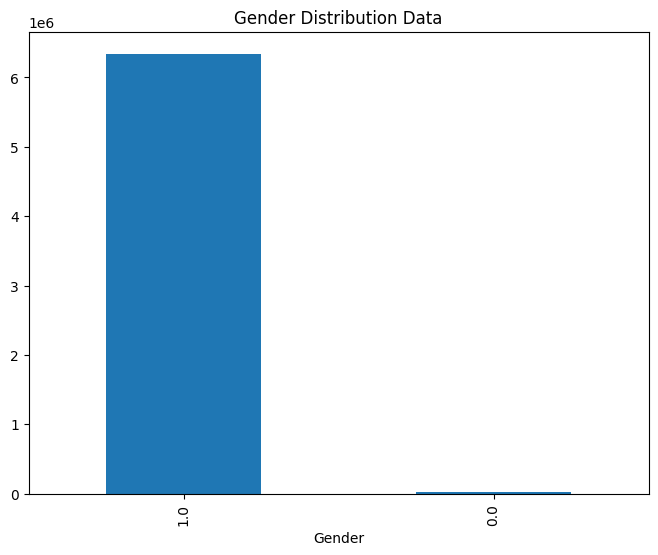

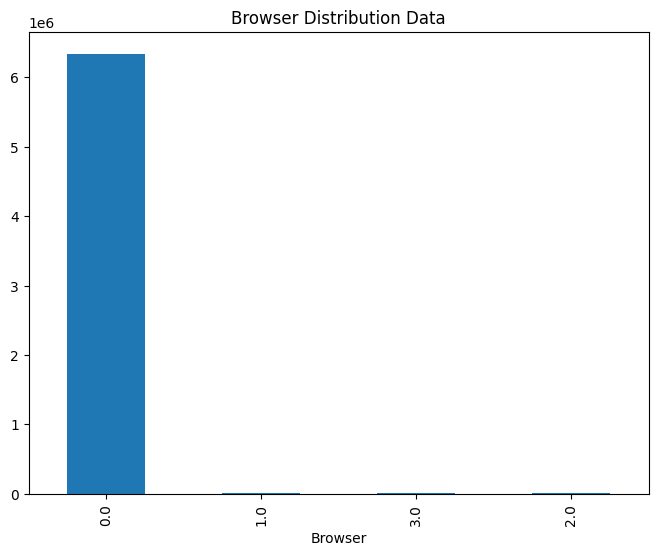

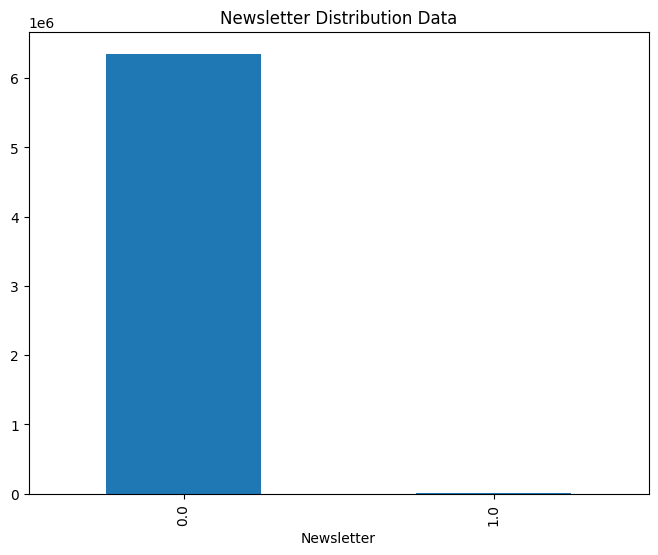

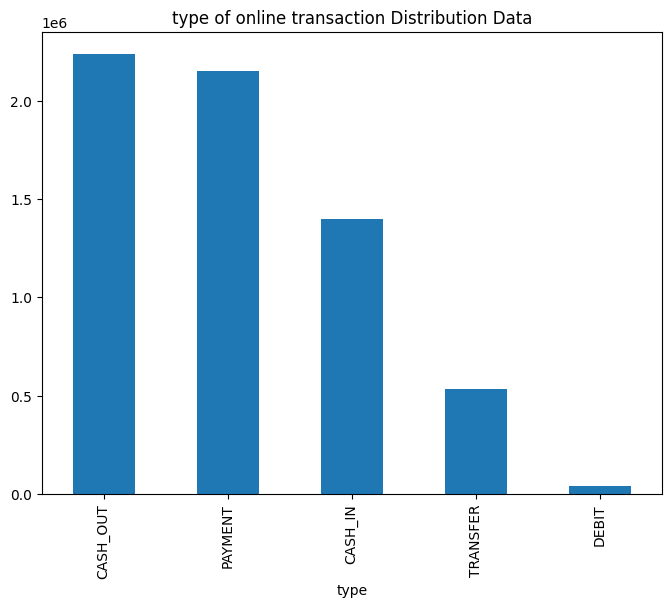

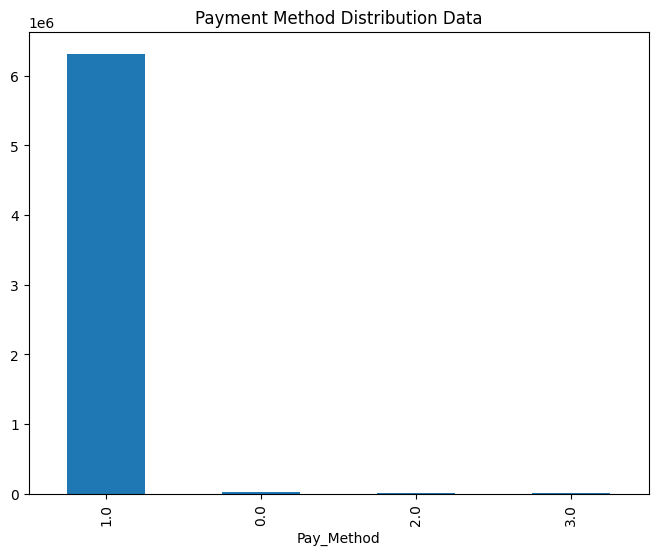

In [23]:
data['Gender'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Gender Distribution Data')
plt.show()

data['Browser'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Browser Distribution Data')
plt.show()

data['Newsletter'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Newsletter Distribution Data')
plt.show()

data['type'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('type of online transaction Distribution Data')
plt.show()

data['Pay_Method'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Payment Method Distribution Data')
plt.show()

In [24]:
male= len(data[data['Gender']==0])
female= len(data[data['Gender']==1])
mobile_app= len(data[data['Browser']==0])
chrome= len(data[data['Browser']==1])
google= len(data[data['Browser']==2])
others= len(data[data['Browser']==3])
nonsubscibed_news= len(data[data['Newsletter']==0])
subscribed_news= len(data[data['Newsletter']==1])
digi_wallet= len(data[data['Pay_Method']==0])
card= len(data[data['Pay_Method']==1])
paypal= len(data[data['Pay_Method']==2])
other_Pmethod= len(data[data['Pay_Method']==3])

print('The number of Male customers are', male, ', while female customers are', female)
print('The number of times the mobile app was used is', mobile_app, ', chrome:', chrome, ', google:', google, ', and others:', others)
print('Number of non subscribed customers are:', nonsubscibed_news, ', subscribed: ', subscribed_news)
print('Number of times digital wallet was used for payment: ', digi_wallet, ', card: ',card, ', Paypal: ', paypal, ', others:', other_Pmethod)

The number of Male customers are 20766 , while female customers are 6341854

The number of times the mobile app was used is 6339864 , chrome: 12582 , google: 3242 , and others: 6932

Number of non subscribed customers are: 6353095 , subscribed:  9525

Number of times digital wallet was used for payment:  18281 , card:  6318465 , Paypal:  13967 , others: 11907


Number of Fraud Transactions:  8213

Number of Legit Transactions:  6354407


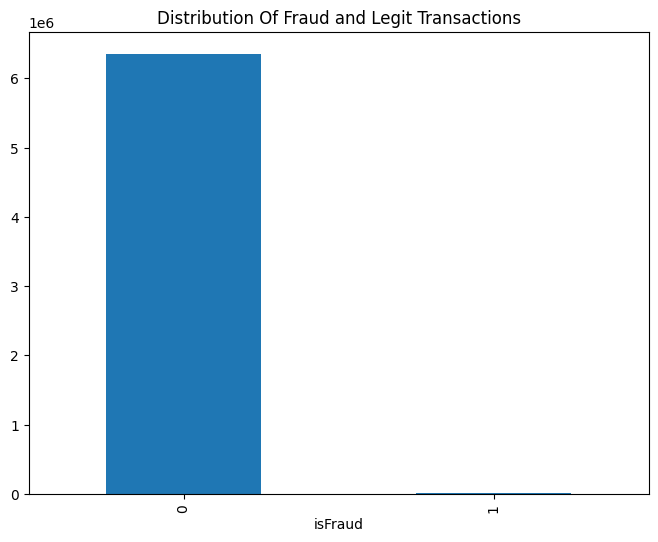

In [25]:
fraud= len(data[data['isFraud']==1])
not_fraud= len(data[data['isFraud']==0])
print('Number of Fraud Transactions: ', fraud)
print('Number of Legit Transactions: ', not_fraud)

data['isFraud'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('Distribution Of Fraud and Legit Transactions')
plt.show()

# Key Point: Comprehensive Customer Engagement and Transaction Analysis

The number of Male customers are 20,766 , while female customers are 6,341,854
The number of times the mobile app was used is 6,339,864 , chrome: 12,582 , google: 3,242 , and others: 6,932
Number of non subscribed customers are: 6,353,095 , subscribed:  9.525
Number of times digital wallet was used for payment:  18,281 , card:  6,318,465 , Paypal:  13,967 , others: 11,907
Number of Fraud Transactions:  8,213
Number of Legit Transactions:  6,354,407

In [26]:
np.unique(np.array([x[0] for x in data['nameOrig']]))

array(['C'], dtype='<U1')

In [27]:
np.unique(np.array([x[0] for x in data['nameDest']]))

array(['C', 'M'], dtype='<U1')

In [28]:
def preprocessing(df):
    df['nameOrig']=np.array([x[1:] for x in df['nameOrig']]).astype(np.int64) #removing the prefix letter C indicating customer type from 'nameOrig' column
    df['Desttype']=[x[0] for x in df['nameDest']] #extracting the prefix letter indicating customer type from the 'nameDest' column and creating a new column
    df['nameDest']=np.array([x[1:] for x in df['nameDest']]).astype(np.int64) #extracting the prefix letter indicating customer type from the 'nameDest' column
    dummies=pd.get_dummies(df,columns=['Desttype']) #one-hot-encoding 
    for column in dummies.columns:
        df[column]=dummies[column]
    df=df.drop(['Desttype'],axis=1) 
    return df

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoder= LabelEncoder()
data['type']= label_encoder.fit_transform(data['type'])

In [30]:
data=preprocessing(data)

In [31]:
data.head()

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Transaction_DATE,Browser,Time_Spent,Newsletter,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Desttype_C,Desttype_M
0,504308.0,53.0,0.0,1.0,2.0,22-06-2021,0.0,885.0,0.0,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,False,True
1,504309.0,18.0,1.0,2.0,3.0,10-12-2021,0.0,656.0,0.0,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,False,True
2,504310.0,52.0,1.0,0.0,1.0,14-03-2021,0.0,761.0,1.0,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,True,False
3,504311.0,29.0,0.0,1.0,5.0,25-10-2021,0.0,906.0,1.0,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,True,False
4,504312.0,21.0,1.0,1.0,1.0,14-09-2021,0.0,605.0,1.0,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,False,True


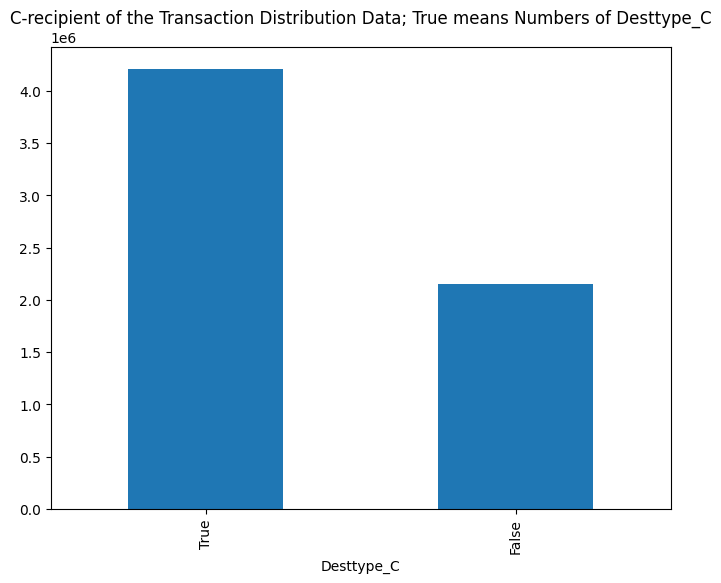

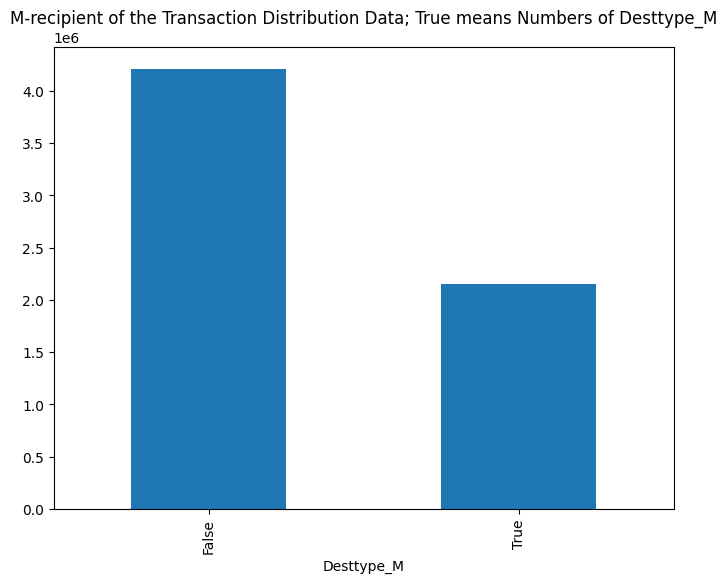

In [32]:
data['Desttype_C'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('C-recipient of the Transaction Distribution Data; True means Numbers of Desttype_C')
plt.show()

data['Desttype_M'].value_counts().plot(kind='bar', figsize=(8,6))
plt.title('M-recipient of the Transaction Distribution Data; True means Numbers of Desttype_M')
plt.show()

# ****Explore Transaction  Patterns and Fraud Rates Across Different Age Groups:****

In [33]:
Transaction_pattern= data.groupby('Gender').agg({'amount': ['mean', 'sum'],
                                                'N_Transactions': ['mean', 'sum'],
                                                'Pay_Method': lambda x: x.mode(), #calculate the most common payment method
                                                'Time_Spent':['mean', 'sum']}).round()
#Extract the output column of the lambda function and rename it
most_common_payment= Transaction_pattern['Pay_Method']['<lambda>']
most_common_payment.columns = ['Most Common Payment Method']

#Drop the original column and replace it with the renamed one
Transaction_pattern.drop(('Pay_Method', '<lambda>'), axis=1, inplace=True)
Transaction_pattern['Most Common Payment Method']= most_common_payment
Transaction_pattern

amount               N_Transactions             Time_Spent  \
            mean           sum           mean         sum       mean   
Gender                                                                 
0.0     161507.0  3.353859e+09            4.0     82890.0      598.0   
1.0     179922.0  1.141039e+12            4.0  25367329.0      599.0   

                     Most Common Payment Method  
                 sum                             
Gender                                           
0.0     1.242517e+07                        1.0  
1.0     3.798796e+09                        1.0

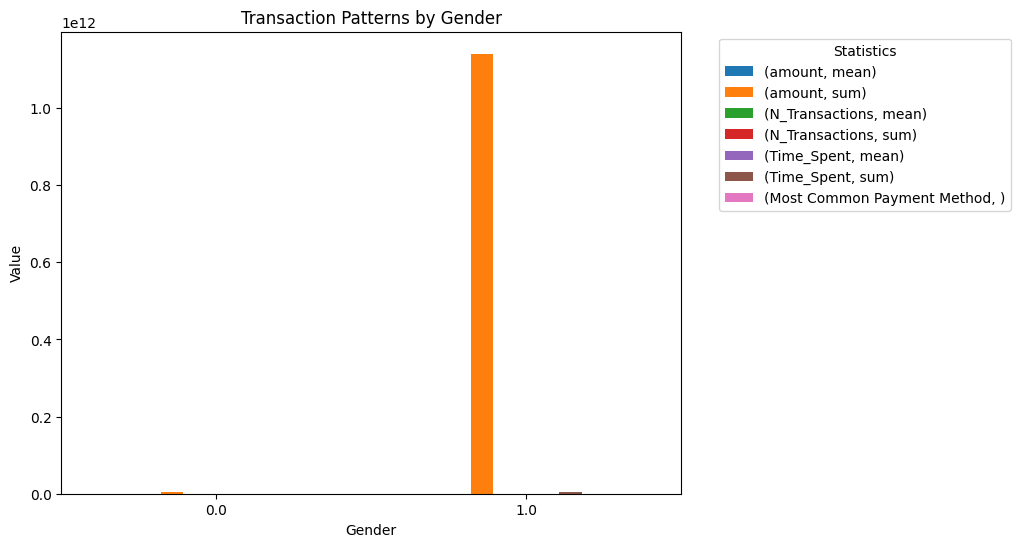

In [34]:
Transaction_pattern.plot(kind='bar', figsize=(8,6))
plt.title('Transaction Patterns by Gender')
plt.xlabel('Gender')
plt.ylabel('Value')
plt.legend(title='Statistics', bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation=0)
plt.show()

# Key Point: Transaction  Patterns among Genders

The analysis reveals that the average transaction amount for males is 161,507 Dollars, whereas for females it is 179,922 Dollars. The total transaction amount for males sums up to 3,353,859,000 Dollars, whereas for females it is 1,141,039,000,000 Dollars.
The average number of transactions made by males and females is 4, with a total of 82,890 transaction for males and 25,367,329 transactions for females.
The most common payment method among both genders is the card.
On average, males spend 598 seconds on the website, whereas females spend 599 seconds. The total time spent on the website by males is 12,425,170 seconds and by females is 3,798,796,000 seconds.


In [35]:
unique_age_values= np.sort(data['Age'].unique())
print(','.join(map(str, unique_age_values))) 
# Sort unique age values in ascending order and print them as a comma-separated string

18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,50.0,51.0,52.0,53.0,54.0,55.0,56.0,57.0,58.0,59.0,60.0,61.0,62.0,63.0


In [36]:
#Define age  ranges and labels for age groups
age_bins= [18,25,35,45,55,65] #Define age bins: 18-24', '25-34', '35-44', '45-54', '55-63
age_labels= ['18-24', '25-34', '35-44', '45-54', '55-63']

#Create a new columns 'Age_Group' based on age bins
data['Age_Groups']= pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [37]:
Transaction_pattern_agegroups= data.groupby('Age_Groups').agg({'amount': ['mean', 'sum'],
                                                'N_Transactions': ['mean', 'sum'],
                                                'Pay_Method': lambda x: x.mode(), #calculate the most common payment method
                                                'Time_Spent':['mean', 'sum']}).round()
#Extract the output column of the lambda function and rename it
most_common_payment= Transaction_pattern_agegroups['Pay_Method']['<lambda>']
most_common_payment.columns = ['Most Common Payment Method']

#Drop the original column and replace it with the renamed one
Transaction_pattern_agegroups.drop(('Pay_Method', '<lambda>'), axis=1, inplace=True)
Transaction_pattern_agegroups['Most Common Payment Method']= most_common_payment
Transaction_pattern_agegroups

amount               N_Transactions             Time_Spent  \
                mean           sum           mean         sum       mean   
Age_Groups                                                                 
18-24       158915.0  1.496977e+09            4.0     37592.0      601.0   
25-34       162656.0  2.229041e+09            4.0     55355.0      598.0   
35-44       179989.0  1.136309e+12            4.0  25252971.0      599.0   
45-54       167061.0  2.336681e+09            4.0     55381.0      601.0   
55-63       164303.0  2.021590e+09            4.0     48920.0      597.0   

                         Most Common Payment Method  
                     sum                             
Age_Groups                                           
18-24       5.665984e+06                        0.0  
25-34       8.193543e+06                        1.0  
35-44       3.781609e+09                        1.0  
45-54       8.409128e+06                        1.0  
55-63       7.344018e+06                        1.0

# Key Point: Insights into Transaction Patterns Across Age Groups

The analysis reveals that within the age group of 18-24 the average transaction amount is 158,915 Dollars, whereas for 25-34 is 162,656 Dollars, for 35-44 is 179,989 Dollars, for 45-54 is 167,061 Dollars,for 55-63 is 164,303 Dollars. The total transaction amount for age group of 18-24 is 1,496,977,000 Dollars, for 25-34 is 2,229,041,000 Dollars, for 35-44 is 1,136,309,000,000 Dollars, for 45-54 is 2,336,681,000 Dollars and for 55-63 is 2,021,590,000 Dollars.


The average number of transactions made by all age groups is 4, with a total of 37,592 transactions for 18-24 age group, 55,355 transactions for 25-34 age group, 25,252,971 transactions for 35-44 age group, 55,381 transactions for 45-54 age group, 48,920 transactions for 55-63 age group.

On average, 18-24 age group spend 601 seconds on the website, 25-34 age group spend 598 seconds on the website, 35-44 age group spend 599 seconds on the website, 45-54 age group spend 601 seconds on the website, 55-63 age group spend 597 seconds on the website. The total time spent on the website by 18-24 age group is 5,665,984  seconds, by 25-34 age groups is 8,193,543 seconds, by 35-44 age group is 3,781,609,000 seconds, 45-54 age group is 8,409,128 seconds, 55-63 age group is 7,344,018 seconds.

The most common payment method made 18-24 age group is Digital Wallet, whereas other age groups is Card.



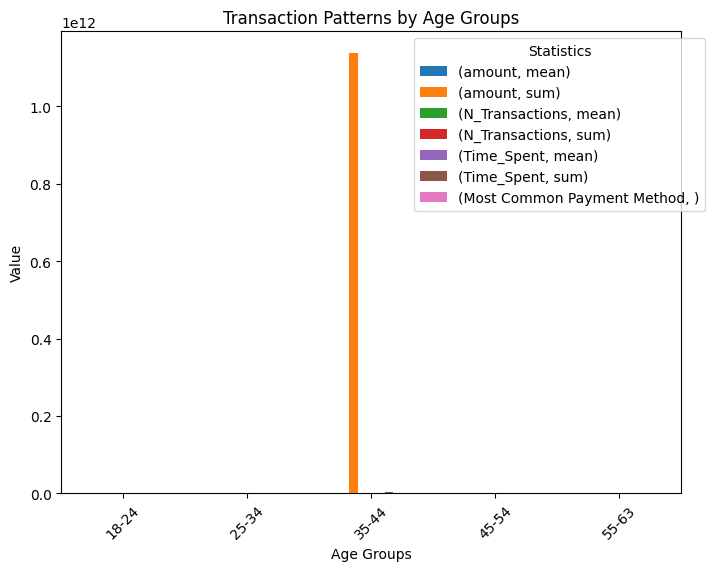

In [38]:
Transaction_pattern_agegroups.plot(kind='bar', figsize=(8,6))
plt.title('Transaction Patterns by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Value')
plt.legend(title='Statistics', bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation=45)
plt.show()

In [39]:
Transaction_pattern_agegroups_gen= data.groupby(['Age_Groups', 'Gender']).agg({'amount': ['mean', 'sum'],
                                                'N_Transactions': ['mean', 'sum'],
                                                'Pay_Method': lambda x: x.mode(), #calculate the most common payment method
                                                'Time_Spent':['mean', 'sum']}).round()
#Extract the output column of the lambda function and rename it
most_common_payment= Transaction_pattern_agegroups_gen['Pay_Method']['<lambda>']
most_common_payment.columns = ['Most Common Payment Method']

#Drop the original column and replace it with the renamed one
Transaction_pattern_agegroups_gen.drop(('Pay_Method', '<lambda>'), axis=1, inplace=True)
Transaction_pattern_agegroups_gen['Most Common Payment Method']= most_common_payment
Transaction_pattern_agegroups_gen

amount               N_Transactions              \
                       mean           sum           mean         sum   
Age_Groups Gender                                                      
18-24      0.0     161294.0  5.051738e+08            4.0     12472.0   
           1.0     157730.0  9.918035e+08            4.0     25120.0   
25-34      0.0     165765.0  7.456121e+08            4.0     18189.0   
           1.0     161137.0  1.483429e+09            4.0     37166.0   
35-44      0.0     160029.0  7.281326e+08            4.0     18320.0   
           1.0     180004.0  1.135581e+12            4.0  25234651.0   
45-54      0.0     166284.0  7.649041e+08            4.0     18080.0   
           1.0     167442.0  1.571777e+09            4.0     37301.0   
55-63      0.0     153045.0  6.100368e+08            4.0     15829.0   
           1.0     169699.0  1.411553e+09            4.0     33091.0   

                  Time_Spent               Most Common Payment Method  
                        mean           sum                             
Age_Groups Gender                                                      
18-24      0.0         601.0  1.883419e+06                        0.0  
           1.0         602.0  3.782565e+06                        0.0  
25-34      0.0         598.0  2.689485e+06                        1.0  
           1.0         598.0  5.504058e+06                        1.0  
35-44      0.0         596.0  2.712839e+06                        1.0  
           1.0         599.0  3.778896e+09                        1.0  
45-54      0.0         602.0  2.767456e+06                        1.0  
           1.0         601.0  5.641672e+06                        1.0  
55-63      0.0         595.0  2.371970e+06                        1.0  
           1.0         598.0  4.972048e+06                        0.0

# Key Point: Insights on Transaction Patterns Across Age Groups and Gender

The analysis reveals that within the age group of 18-24 the average transaction amount for males is 161,294 Dollars, whereas for females is 157,730 Dollars. The total transaction amount for males sums up to 505,173,800 Dollars, whereas for females, it is 991,803,500  Dollars.
The average number of transactions made by males and females is 4, with a total of 12,472 transactions for males and 25,120 transactions for females.

The most common payment method made by both genders is the Digital wallet.

On average, males spend 601 seconds on the website, whereas females spend 602 seconds. The total time spent on the website by males is 1,883,419 seconds, and by females, it is 3,782,565 seconds.


The analysis reveals that within the age group of 25-34 the average transaction amount for males is 165,765 Dollars, whereas for females is 161,137 Dollars. The total transaction amount for males sums up to 745,612,100 Dollars, whereas for females, it is 1,483,429,000  Dollars.
The average number of transactions made by males and females is 4, with a total of 18,189 transactions for males and 37,166 transactions for females.

The most common payment method among both genders is the Card.

On average, both genders spend 598 seconds on the website, The total time spent on the website by males is 2,689,485 seconds, and by females, it is 5,504,058 seconds.


The analysis reveals that within the age group of 35-44	 the average transaction amount for males is 160,029 Dollars, whereas for females is 180,004 Dollars. The total transaction amount for males sums up to 728,132,600  Dollars, whereas for females, it is 1,135,581,000,000  Dollars.
The average number of transactions made by males and females is 4, with a total of 18,320 transactions for males and 25,234,651 transactions for females.

The most common payment method among both genders is the Card.

On average, males spend 596 seconds on the website, whereas females spend 599 seconds. The total time spent on the website by males is 2,712,839 seconds, and by females, it is 3,778,896,000 seconds.


The analysis reveals that within the age group of 45-54	 the average transaction amount for males is 166,284 Dollars, whereas for females is 167,442 Dollars. The total transaction amount for males sums up to 764,904,100 Dollars, whereas for females, it is 1,571,777,000 Dollars.
The average number of transactions made by males and females is 4, with a total of 18,080 transactions for males and 37,301 transactions for females.

The most common payment method among both genders is the Card.

On average, males spend 602 seconds on the website, whereas females spend 601 seconds. The total time spent on the website by males is 2,767,456 seconds, and by females, it is 5,641,672 seconds.


The analysis reveals that within the age group of 55-63	 the average transaction amount for males is 153,045 Dollars, whereas for females is 169,699 Dollars. The total transaction amount for males sums up to 610,036,800  Dollars, whereas for females, it is 1,411,553,000  Dollars.
The average number of transactions made by males and females is 4, with a total of 15,829 transactions for males and 33,091 transactions for females.

The most common payment method made by males is the Card, whereas for females, it is the Digital wallet.

On average, males spend 595 seconds on the website, whereas females spend 598 seconds. The total time spent on the website by males is 2,371,970 seconds, and by females, it is 4,972,048 seconds.


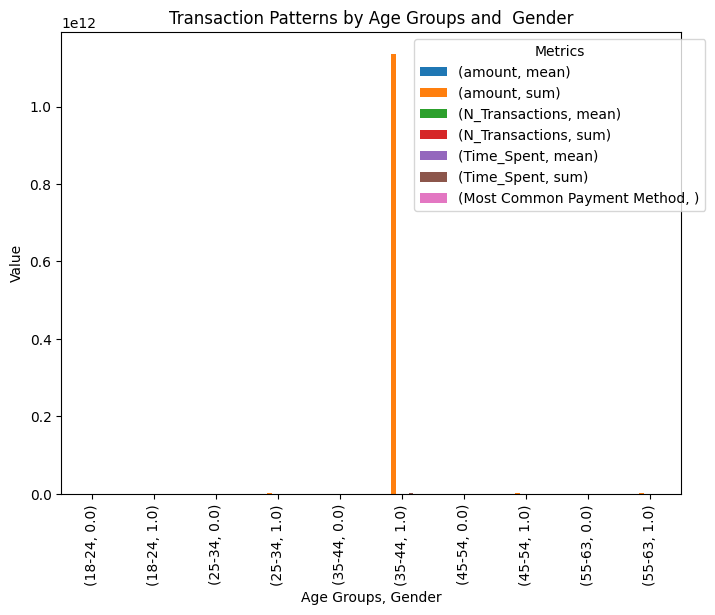

In [40]:
Transaction_pattern_agegroups_gen.plot(kind='bar', figsize=(8,6))
plt.title('Transaction Patterns by Age Groups and  Gender')
plt.xlabel('Age Groups, Gender')
plt.ylabel('Value')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation=90)
plt.show()

In [41]:
fraud= len(data[data['isFraud']==1])
not_fraud= len(data[data['isFraud']==0])
print('Number of Fraud Transactions: ', fraud)
print('Number of Legit Transactions: ', not_fraud)

Number of Fraud Transactions:  8213

Number of Legit Transactions:  6354407


In [42]:
grouped_gen= data.groupby('Gender').agg({'isFraud':['mean', 'sum']})
#Group the data by 'Gender' and calculate mean and sum of 'isFraud' for each group
grouped_gen # finally, display the dataframe

isFraud      
            mean   sum
Gender                
0.0     0.001878    39
1.0     0.001289  8174

# Observation: Gender Disparity in Fraudulent Transactions

****This indicates that more fraud transactions were conducted by female customers.****

In [43]:
age_groups= data.groupby('Age_Groups').agg({'isFraud': ['mean', 'sum']})
age_groups.sort_values(by=('isFraud', 'sum'), ascending=False)
#Group the data by 'Age_Groups' and calculate mean and sum of 'isFraud' for each group
# and sort the resulting DataFrame by the sum of 'isFraud' in descending order.
#Finally, display the sorted Dataframe

isFraud      
                mean   sum
Age_Groups                
35-44       0.001289  8140
45-54       0.001787    25
25-34       0.001459    20
55-63       0.001219    15
18-24       0.001380    13

# Observation: Fraud Analysis by Age Group

****This indicates that more fraud transactions were conducted by customers within 35-44 age group****

In [44]:
age_groups_gen= data.groupby(['Age_Groups', 'Gender']).agg({'isFraud': ['mean', 'sum']})
age_groups_gen.sort_values(by=('isFraud', 'sum'), ascending=False)
#Group the data by 'Age_Groups' and 'Gender' and calculate mean and sum of 'isFraud' for each group
# and sort the resulting DataFrame by the sum of 'isFraud' in descending order.
#Finally, display the sorted Dataframe

isFraud      
                       mean   sum
Age_Groups Gender                
35-44      1.0     0.001289  8130
45-54      1.0     0.001491    14
25-34      1.0     0.001195    11
45-54      0.0     0.002391    11
35-44      0.0     0.002198    10
55-63      1.0     0.001202    10
18-24      1.0     0.001431     9
25-34      0.0     0.002001     9
55-63      0.0     0.001254     5
18-24      0.0     0.001277     4

# Observation: Fraud Analysis by Age Group and Gender

****This indicates that more fraud transactions were conducted by female customers within 35-44 age group****

In [45]:
fraud_money_data= data[data['isFraud']==1]
fraud_money_data

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Transaction_DATE,Browser,Time_Spent,Newsletter,type,...,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Desttype_C,Desttype_M,Age_Groups
2,504310.0,52.0,1.0,0.0,1.0,14-03-2021,0.0,761.0,1.0,4,...,1305486145,181.00,0.0,553264065,0.00,0.00,1,True,False,45-54
3,504311.0,29.0,0.0,1.0,5.0,25-10-2021,0.0,906.0,1.0,1,...,840083671,181.00,0.0,38997010,21182.00,0.00,1,True,False,25-34
251,504559.0,39.0,1.0,2.0,6.0,16-03-2021,0.0,144.0,0.0,4,...,1420196421,2806.00,0.0,972765878,0.00,0.00,1,True,False,35-44
252,504560.0,47.0,1.0,3.0,5.0,05-07-2021,0.0,444.0,0.0,1,...,2101527076,2806.00,0.0,1007251739,26202.00,0.00,1,True,False,45-54
680,504988.0,32.0,1.0,0.0,1.0,31-10-2021,1.0,989.0,1.0,4,...,137533655,20128.00,0.0,1848415041,0.00,0.00,1,True,False,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,6869620.0,41.0,1.0,1.0,4.0,03-07-2021,0.0,599.0,0.0,1,...,786484425,339682.13,0.0,776919290,0.00,339682.13,1,True,False,35-44
6362616,6869621.0,41.0,1.0,1.0,4.0,03-07-2021,0.0,599.0,0.0,4,...,1529008245,6311409.28,0.0,1881841831,0.00,0.00,1,True,False,35-44
6362617,6869622.0,41.0,1.0,1.0,4.0,03-07-2021,0.0,599.0,0.0,1,...,1162922333,6311409.28,0.0,1365125890,68488.84,6379898.11,1,True,False,35-44
6362618,6869623.0,41.0,1.0,1.0,4.0,03-07-2021,0.0,599.0,0.0,4,...,1685995037,850002.52,0.0,2080388513,0.00,0.00,1,True,False,35-44


In [46]:
fraud_money= fraud_money_data.groupby(['isFraud', 'Age_Groups','Gender']).agg({'amount': ['mean', 'sum'],
                                                                              'Pay_Method': lambda x: x.mode().iloc[0] if not x.empty else None
                                                                              }).round()
most_common_payment= fraud_money['Pay_Method']['<lambda>']
most_common_payment.columns = ['Most Common Payment Method']

#Drop the original column and replace it with the renamed one
fraud_money.drop(('Pay_Method', '<lambda>'), axis=1, inplace=True)
fraud_money['Most Common Payment Method']= most_common_payment

fraud_money

amount               Most Common Payment Method
                                mean           sum                           
isFraud Age_Groups Gender                                                    
1       18-24      0.0       56064.0  2.242540e+05                        1.0
                   1.0      117387.0  1.056486e+06                        1.0
        25-34      0.0      364753.0  3.282777e+06                        3.0
                   1.0      155551.0  1.711060e+06                        0.0
        35-44      0.0     1384681.0  1.384681e+07                        2.0
                   1.0     1476477.0  1.200376e+10                        1.0
        45-54      0.0       56250.0  6.187480e+05                        2.0
                   1.0     1556202.0  2.178682e+07                        1.0
        55-63      0.0     1017548.0  5.087742e+06                        1.0
                   1.0      504564.0  5.045645e+06                        2.0

# Observation: Fraudulent Transaction Analysis by Age Group and Gender


This analysis reveals that within the 18-24 age group, the average fraud transaction amount conducted by males is 56,064, with a total of 224,254 in fraud transactions. The most common payment method used for fraudulent transactions in this age group was a card. Conversely, females in the same age group had an average fraud transaction amount of 117,387, totaling 1,056,486 in fraud transactions. Similar to males, the most prevalent payment method used for fraudulent transactions by females was also a card.

This analysis reveals that within the 25-34 age group, the average fraud transaction amount conducted by males is 364,753, with a total of 3,282,777 in fraud transactions. The most common payment method used for fraudulent transactions in this age group was  other payment method. Conversely, females in the same age group had an average fraud transaction amount of 155,551, totaling 1,711,060 in fraud transactions. The most prevalent payment method used for fraudulent transactions by females was Digital Wallet.

This analysis reveals that within the 35-44 age group, the average fraud transaction amount conducted by males is 1,384,681 Dollars, with a total of 13,846,810 Dollars in fraud transactions. The most common payment method used for fraudulent transactions in this age group was Paypal. Conversely, females in the same age group had an average fraud transaction amount of 1,476,477 Dollars, totaling 12,003,760,000 Dollars in fraud transactions. The most prevalent payment method used for fraudulent transactions by females was a Card.

This analysis reveals that within the 45-54 age group, the average fraud transaction amount conducted by males is 56,250 Dollars, with a total of 618,748 Dollars in fraud transactions. The most common payment method used for fraudulent transactions in this age group was Paypal. Conversely, females in the same age group had an average fraud transaction amount of 1,556,202 Dollars, totaling 21,786,824 Dollars in fraud transactions. The most prevalent payment method used for fraudulent transactions by females was a Card.

This analysis reveals that within the 55-63 age group, the average fraud transaction amount conducted by males is 1,017,548 Dollars, with a total of 5,087,742 Dollars in fraud transactions. The most common payment method used for fraudulent transactions in this age group was a Card. Conversely, females in the same age group had an average fraud transaction amount of 504,564 Dollars, totaling 5,045,645 Dollars in fraud transactions. The most prevalent payment method used for fraudulent transactions by females was Paypal.

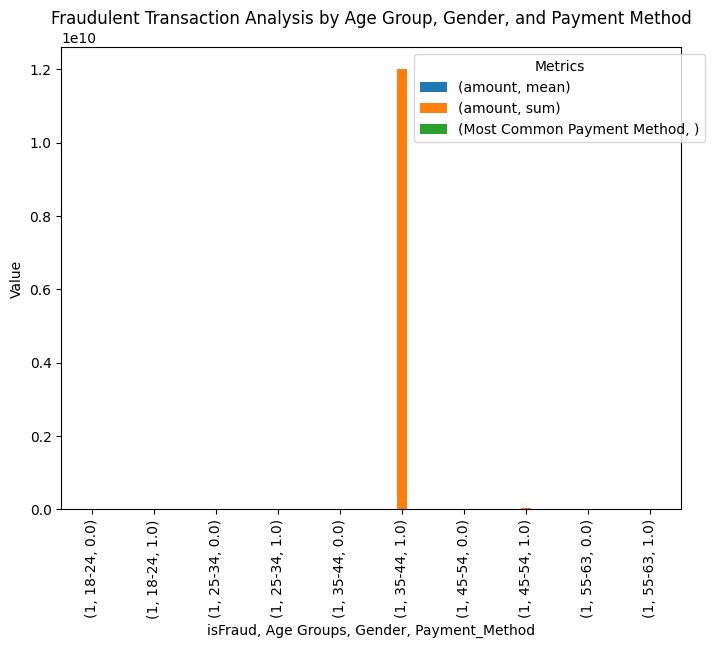

In [47]:
fraud_money.plot(kind='bar', figsize=(8,6))
plt.title('Fraudulent Transaction Analysis by Age Group, Gender, and Payment Method')
plt.xlabel('isFraud, Age Groups, Gender, Payment_Method')
plt.ylabel('Value')
plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation=90)
plt.show()

In [48]:
age_gen= fraud_money_data.groupby(['isFraud', 'Age','Gender']).agg({'amount': ['mean', 'sum'],
                                                                              'Pay_Method': lambda x: x.mode().iloc[0] if not x.empty else None
                                                                              }).round()
most_common_payment= age_gen['Pay_Method']['<lambda>']
most_common_payment.columns = ['Most Common Payment Method']

#Drop the original column and replace it with the renamed one
age_gen.drop(('Pay_Method', '<lambda>'), axis=1, inplace=True)
age_gen['Most Common Payment Method']= most_common_payment

# This indicates that more fraud transactions were conducted by female customers at the age of 40.
age_gen.sort_values(by=('amount', 'sum'), ascending=False)

amount               Most Common Payment Method
                           mean           sum                           
isFraud Age  Gender                                                     
1       41.0 1.0      1478175.0  1.199983e+10                        1.0
        54.0 1.0      5044816.0  1.008963e+07                        2.0
        53.0 1.0     10000000.0  1.000000e+07                        0.0
        41.0 0.0      5460003.0  5.460003e+06                        1.0
        39.0 0.0      5460003.0  5.460003e+06                        0.0
        62.0 0.0      1015399.0  3.046196e+06                        3.0
        36.0 0.0      1291495.0  2.582990e+06                        1.0
        62.0 1.0      1282485.0  2.564970e+06                        1.0
        30.0 0.0       728046.0  2.184137e+06                        3.0
        61.0 1.0       819386.0  1.638772e+06                        0.0
        42.0 1.0       393281.0  1.179843e+06                        3.0
        51.0 1.0       588041.0  1.176083e+06                        1.0
        44.0 1.0       380528.0  1.141583e+06                        0.0
        25.0 1.0      1096187.0  1.096187e+06                        3.0
        58.0 0.0      1078014.0  1.078014e+06                        1.0
        40.0 1.0       994453.0  9.944530e+05                        2.0
        60.0 0.0       963532.0  9.635320e+05                        1.0
        33.0 0.0       963532.0  9.635320e+05                        3.0
        20.0 1.0       328934.0  6.578680e+05                        0.0
        43.0 1.0       288895.0  5.777890e+05                        2.0
        63.0 1.0       213113.0  4.262250e+05                        1.0
        59.0 1.0       188255.0  3.765100e+05                        2.0
        19.0 1.0       144602.0  2.892030e+05                        0.0
        47.0 1.0        69431.0  2.777250e+05                        1.0
        31.0 1.0       136500.0  2.730000e+05                        0.0
        40.0 0.0        76833.0  2.304990e+05                        0.0
        52.0 0.0       216422.0  2.164220e+05                        0.0
        49.0 0.0        93594.0  1.871880e+05                        2.0
        26.0 1.0        85082.0  1.701640e+05                        0.0
        21.0 0.0        81682.0  1.633640e+05                        1.0
        46.0 1.0        61035.0  1.220710e+05                        1.0
        34.0 1.0        39847.0  1.195400e+05                        1.0
        48.0 0.0        47947.0  9.589400e+04                        0.0
        25.0 0.0        89631.0  8.963100e+04                        3.0
        45.0 1.0        86070.0  8.607000e+04                        0.0
        19.0 0.0        30445.0  6.089100e+04                        1.0
        37.0 0.0        60727.0  6.072700e+04                        0.0
        18.0 1.0        43092.0  4.309200e+04                        1.0
        23.0 1.0        19389.0  3.877900e+04                        0.0
        48.0 1.0        35064.0  3.506400e+04                        1.0
        51.0 0.0        33333.0  3.333300e+04                        0.0
        35.0 1.0        15512.0  3.102500e+04                        1.0
        53.0 0.0        30521.0  3.052100e+04                        2.0
        38.0 0.0        29708.0  2.970800e+04                        2.0
        47.0 0.0        14596.0  2.919200e+04                        2.0
        50.0 0.0        25976.0  2.597600e+04                        2.0
        35.0 0.0        22877.0  2.287700e+04                        2.0
        56.0 1.0        21922.0  2.192200e+04                        2.0
        28.0 1.0        21922.0  2.192200e+04                        3.0
        29.0 0.0        10876.0  2.175200e+04                        1.0
        26.0 0.0        21729.0  2.172900e+04                        0.0
        32.0 1.0        20128.0  2.012800e+04                        0.0
        21

# Key Observation: Demographic Insights into Fraudulent Transactions

This indicates that the highest number of fraudulent transactions were conducted by female customers who are 41 years old, with an average fraudulent transaction amount of 1,478,175 Dollars. The total fraudulent transaction amount attributed to this demographic is 11,999,830,000 Dollars. Furthermore, the most common payment method used for fraudulent transactions is the Card, which is consistent across multiple age groups.

# ****Investigating Fraud Transaction Patterns Across Pay Methods****

In [49]:
pay_methods= fraud_money_data.groupby('Pay_Method')

In [50]:
payment_stats= pay_methods.agg({'N_Transactions': ['sum'],
                'amount': ['mean'],
                'isFraud': ['mean', 'sum']}).round()
payment_stats

N_Transactions     amount isFraud      
                      sum       mean    mean   sum
Pay_Method                                        
0.0                  86.0   901194.0     1.0    24
1.0               32572.0  1475446.0     1.0  8141
2.0                 110.0   494502.0     1.0    25
3.0                  94.0   470351.0     1.0    23

# Key Observation: Fraudulent Transaction Analysis by Payment Method


This analysis reveals that the total number of Fraud transactions made with digital wallets (0) is 86, while with cards (1) it is 32,572, with PayPal (2) it is 110, and with other methods (3) it is 94. The average fraud transaction amount using digital wallets is 901,194 dollars, for cards it is 1,475,446 dollars, for PayPal it is 494,502 dollars, and for other methods it is 470,351 dollars. The total number of fraudulent transactions made with digital wallets is 24, with cards it is 8,141, with PayPal it is 25, and with other methods it is 23.

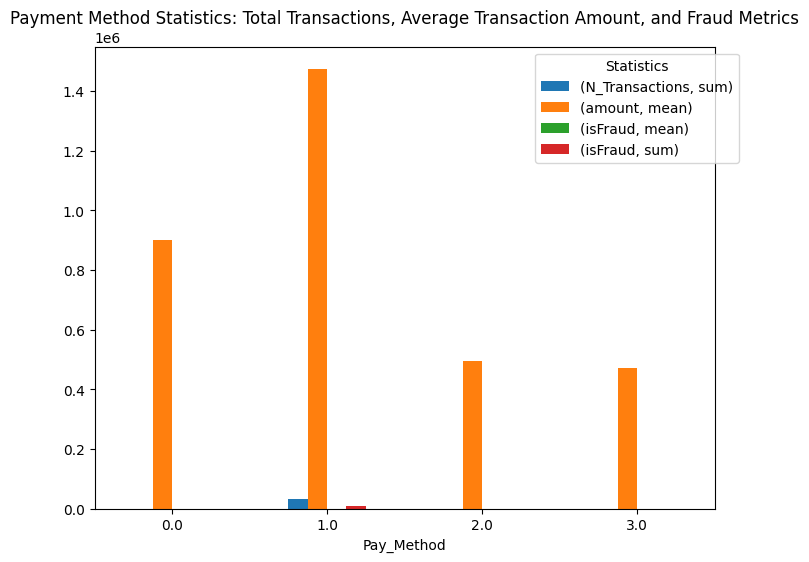

In [51]:
payment_stats.plot(kind='bar', figsize=(8,6))
plt.title('Payment Method Statistics: Total Transactions, Average Transaction Amount, and Fraud Metrics')
plt.legend(title='Statistics', bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation=0)
plt.show()

In [52]:
payment_method_stats= data.groupby('Pay_Method')['isFraud'].agg(total_transactions='count', fraudulent_transactions='sum')
total_transactions_all= payment_method_stats['total_transactions'].sum()
payment_method_stats['Fraud_rate_in_Each_PaymentMthod']= (payment_method_stats['fraudulent_transactions'] / payment_method_stats['total_transactions']) * 100
payment_method_stats['Overall_Fraud_Rate']= (payment_method_stats['fraudulent_transactions'] / total_transactions_all) * 100
payment_method_stats

,total_transactions,fraudulent_transactions,Fraud_rate_in_Each_PaymentMthod,Overall_Fraud_Rate
Pay_Method,,,,
0.0,18281,24,0.131284,0.000377
1.0,6318465,8141,0.128845,0.127950
2.0,13967,25,0.178993,0.000393
3.0,11907,23,0.193164,0.000361


# Key Point: Payment Method Fraud Analysis Highlights




This analysis reveals that in the digital wallet payment method, out of 18,281 transactions, 24 were fraudulent, which means that 0.131284% of digital wallet transactions were fraudulent. Additionally, 0.000377% of digital wallet transactions of the total transactions involving all payment methods were fraudulent.

In the card payment method, out of 6,318,465 transactions, 8,141 were fraudulent, which means  0.128845% of card transactions were fraudulent. Similarly,  0.127950% of card transactions out of the total transactions involving all payment methods were fraudulent.

For the PayPal payment method, out of 13,967 transactions, 25 were fraudulent, indicating that  0.178993% of PayPal transactions were fraudulent. Moreover, 0.000393% of PayPal transactions out of the total transactions involving all payment methods were fraudulent.

In the 'Others' payment method, out of 11,907 transactions, 23 were fraudulent, meaning that 0.193164% of transactions using other payment methods were fraudulent. Furthermore, 0.000361% of 'Others' transactions out of the total transactions involving all payment methods were fraudulent.

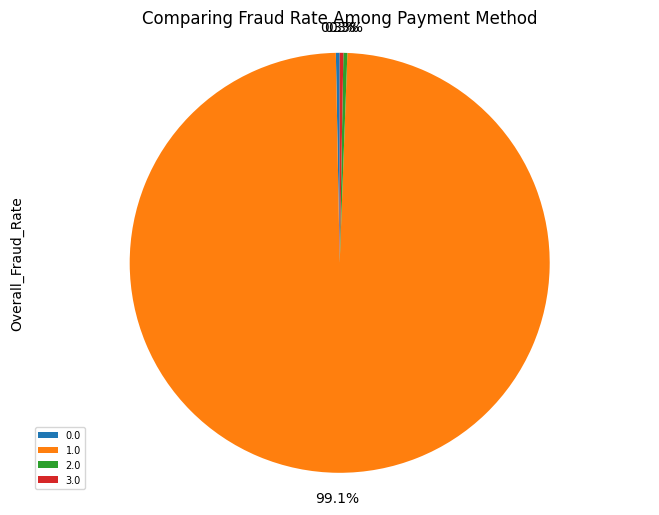

In [53]:
payment_method_stats['Overall_Fraud_Rate'].plot(kind='pie', figsize=(8,6),
                                    autopct='%1.1f%%',
                                    pctdistance=1.12,
                                    startangle=90,
                                    labels=None,
                                    shadow=False)
plt.title('Comparing Fraud Rate Among Payment Method')
plt.axis('equal')
plt.legend(labels=payment_method_stats.index, loc='lower left', fontsize=7)
plt.show()

# Investigating Fraud Transaction Patterns Across Types of Online Transactions

# Type Of Online Transaction Encoded Details

****where Type of online Transactions values; 1 is Cash_out, 3 is Payment, 0 is Cash_in, 4 is Transfer and 2 is Debit****

In [54]:
fraud_money_data[['type']].value_counts()

type
1       4116
4       4097
Name: count, dtype: int64

# Key Observation: Dominant Types of Online Fraud Transactions

***This shows that Cash_Out and Transfer were the only Type of Online Fraud Transactions***

In [55]:
type_transactions= fraud_money_data.groupby('type')

In [56]:
type_stats= type_transactions.agg({'N_Transactions': ['sum'],
                'amount': ['mean', 'sum'],
                'isFraud': ['sum']}).round()
type_stats

N_Transactions     amount               isFraud
                sum       mean           sum     sum
type                                                
1           16479.0  1455103.0  5.989202e+09    4116
4           16383.0  1480892.0  6.067213e+09    4097

# Key Observation: Fraud Transaction Analysis by Transaction Type

This analysis reveals that the total number of Fraud transactions made with Cash_out (1) is 16,479, while with transfer (4) it is 16,383. The average fraud transaction amount using Cash_out is 1,455,103 dollars, for transfer it is 1,480,892 dollars.The total fraudulent transactions amount made with cash_out is 5,989,202,000 dollars, with transfer it is 6,067,213,000 dollars.The total sum of fraudulent transactions made with cash_out is 4116, with transfer it is 4097.

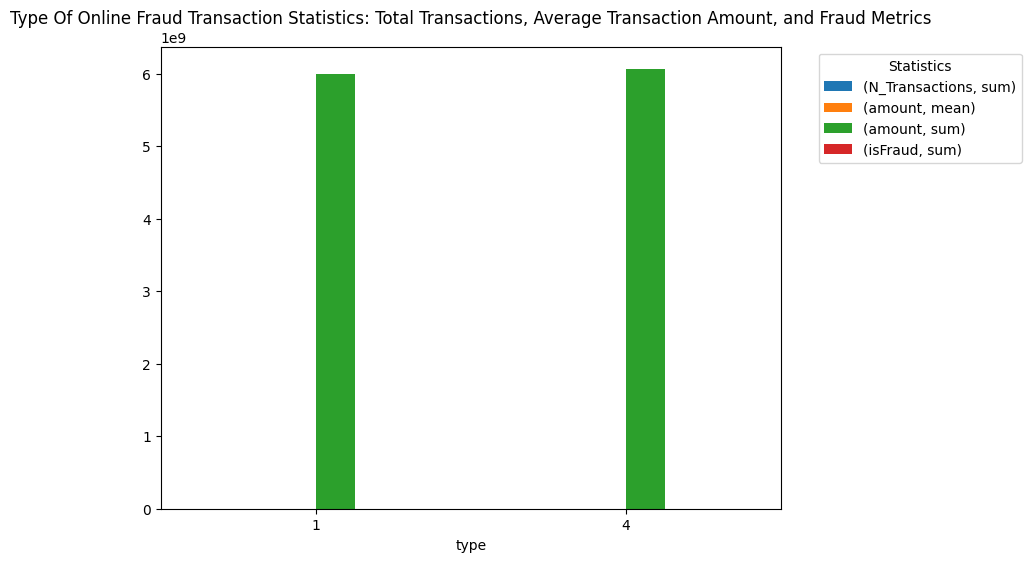

In [57]:
type_stats.plot(kind='bar', figsize=(8,6))
plt.title('Type Of Online Fraud Transaction Statistics: Total Transactions, Average Transaction Amount, and Fraud Metrics')
plt.legend(title='Statistics', bbox_to_anchor=(1.05, 1), loc='best')
plt.xticks(rotation=0)
plt.show()

In [58]:
type_trans_stats= data.groupby('type')['isFraud'].agg(total_transactions='count', fraudulent_transactions='sum')
total_transactions_all= type_trans_stats['total_transactions'].sum()
type_trans_stats['Fraud_rate_in_Each_PaymentMthod']= (type_trans_stats['fraudulent_transactions'] / type_trans_stats['total_transactions']) * 100
type_trans_stats['Overall_Fraud_Rate']= (type_trans_stats['fraudulent_transactions'] / total_transactions_all) * 100
type_trans_stats

,total_transactions,fraudulent_transactions,Fraud_rate_in_Each_PaymentMthod,Overall_Fraud_Rate
type,,,,
0,1399284,0,0.000000,0.000000
1,2237500,4116,0.183955,0.064690
2,41432,0,0.000000,0.000000
3,2151495,0,0.000000,0.000000
4,532909,4097,0.768799,0.064392


# Observation: Fraudulent Transaction Analysis by Transaction Type


This analysis reveals that in the Cash_in(0) online type of transaction, out of 1,399,284 transactions, 0 were fraudulent, which means that 0% of Cash_in transactions were fraudulent. Additionally, 0% of Cash_in transactions of the total transactions involving all online type of transaction were fraudulent.

In the Cash_out(1) online type of transaction, out of 2,237,500 transactions, 4,116 were fraudulent, which means approximately 0.2% of Cash_out transactions were fraudulent. Similarly, approximately 0.1% of Cash_out transactions out of the total transactions involving all online type of transaction were fraudulent.

For the Debit(2) online type of transaction, out of 41,432 transactions, 0 were fraudulent, indicating that 0% of Debit transactions were fraudulent. Moreover, 0% of Debit transactions out of the total transactions involving all online type of transaction were fraudulent.

For the Payment(3) online type of transaction, out of 2,151,495 transactions, 0 were fraudulent, indicating that 0% of Payment transactions were fraudulent. Moreover, 0% of Payment transactions out of the total transactions involving all online type of transaction were fraudulent.

For the Transfer(4) online type of transaction, out of 532,909 transactions, 4,097 were fraudulent, indicating that 0.8% of Transfer transactions were fraudulent. Moreover, 0.1% of Transfer transactions out of the total transactions involving all online type of transaction were fraudulent.

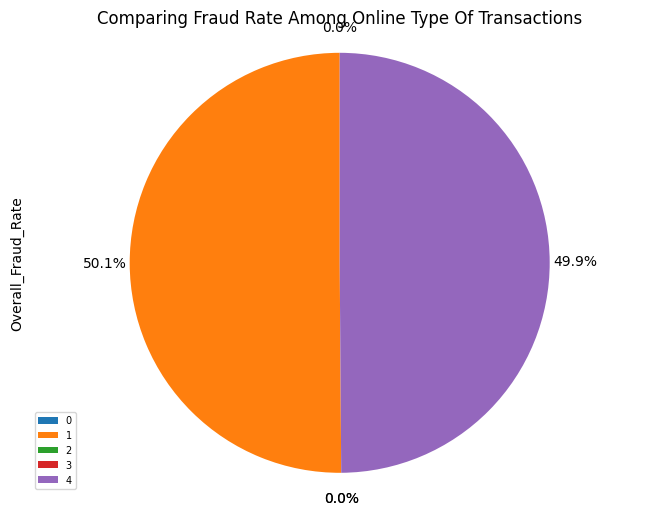

In [59]:
type_trans_stats['Overall_Fraud_Rate'].plot(kind='pie', figsize=(8,6),
                                    autopct='%1.1f%%',
                                    pctdistance=1.12,
                                    startangle=90,
                                    labels=None,
                                    shadow=False)
plt.title('Comparing Fraud Rate Among Online Type Of Transactions')
plt.axis('equal')
plt.legend(labels=type_trans_stats.index, loc='lower left', fontsize=7)
plt.show()

This visualization shows that 50.1% Cash_out type of Online Transaction were used for Fraud Transactions and 49.9% of Transfer type of Online Transaction were used for Fraud Transaction while other Type of Transactions weren't used for Fraud

In [60]:
#Convert 'Transaction_DATE' column to datetime format
data['Transaction_DATE']= pd.to_datetime(data['Transaction_DATE'])
#Group the data by 'Pay_Method' and 'Transaction_DATE'
time_pay= data.groupby(['Pay_Method', data['Transaction_DATE'].dt.to_period('M')]).agg({
    'amount': ['mean'], #calculate the average transaction amount 
    'isFraud': ['mean'] #calculate the average fraud rate
}).reset_index()
time_pay

,Pay_Method,Transaction_DATE,amount,isFraud
,,,mean,mean
0,0.0,2021-01,163754.090033,0.001315
1,0.0,2021-02,170362.181782,0.000742
2,0.0,2021-03,160333.873751,0.002569
3,0.0,2021-04,162872.528084,0.000656
4,0.0,2021-05,169855.654730,0.001287
5,0.0,2021-06,163287.764775,0.000672
6,0.0,2021-07,153203.447065,0.001313
7,0.0,2021-08,155314.332328,0.001334
8,0.0,2021-09,175745.679646,0.001287


# Average Transaction Amount Over Time by Payment Method

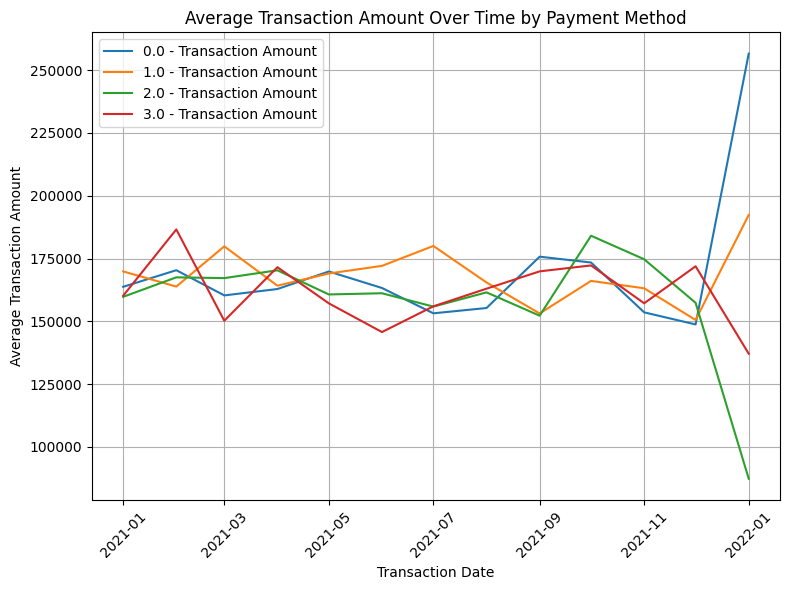

In [61]:
#convert period objects back to datetime objects
time_pay['Transaction_DATE']= time_pay['Transaction_DATE'].dt.to_timestamp()

#plot the data
plt.figure(figsize=(8,6))
#loop through each payment method
for pay_method, group_data in time_pay.groupby('Pay_Method'):
    plt.plot(group_data['Transaction_DATE'], group_data['amount'], label=f'{pay_method} - Transaction Amount')
    
plt.xlabel('Transaction Date')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount Over Time by Payment Method')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Key Observation: Shift in Payment Method Usage Throughout the Year


This visualization shows: 
Card: Most used at the beginning of the year with an average transaction amount of 169,877 dollars, but dropped to the second most used by the end of the year with an average transaction amount of 192,352 dollars.

Digital Wallet: Second most used at the beginning of the year with an average transaction amount of 163,754 dollars, and became the most used by the end of the year with an average transaction amount of 256,573 dollars.

PayPal: Least used throughout the year, with an average transaction amount of 159,768 dollars at the beginning and dropping to 87,371 dollars by the end.

Other Payment Methods: Third most used throughout the year, with an average transaction amount of 160,203 dollars at the beginning and 137,129 dollars by the end.


# **Exploring the Impact of Newsletter Subscription on Fraud**

In [62]:
news_fraud= fraud_money_data.groupby('Newsletter').agg({
    'isFraud': 'sum'
})
news_fraud

,isFraud
Newsletter,
0.0,8200
1.0,13


# Key Observation: Impact of Newsletter Subscription on Fraud Instances


This shows that customers who didn't subscribe to the newsletter committed more fraud, totaling 8200 instances, while those who did subscribe committed fewer frauds, totaling 13 instances.

In [63]:
news= fraud_money_data.groupby(['Newsletter', 'Age']).agg({
    'isFraud': 'sum',
    'amount': 'sum',
    'N_Transactions': 'sum',
    'Pay_Method': lambda x: x.mode().iloc[0] if not x.empty else None
}).round()

most_common_payment= news['Pay_Method']
most_common_payment.columns = ['Most Common Payment Method']

#Drop the original column and replace it with the renamed one
news.drop('Pay_Method', axis=1, inplace=True)
news['Most Common Payment Method']= most_common_payment

news.sort_values(by=('amount'), ascending=False)

isFraud        amount  N_Transactions  \
Newsletter Age                                           
0.0        41.0     8119  1.200529e+10         32474.0   
           53.0        2  1.003052e+07             5.0   
1.0        54.0        1  1.000000e+07             2.0   
0.0        62.0        4  5.581458e+06            22.0   
           39.0        2  5.462809e+06            10.0   
           36.0        2  2.582990e+06             9.0   
           30.0        3  2.184137e+06             6.0   
1.0        61.0        1  1.277213e+06             2.0   
0.0        40.0        4  1.224952e+06            13.0   
           51.0        3  1.209416e+06            17.0   
           42.0        3  1.179843e+06            12.0   
           44.0        3  1.141583e+06            15.0   
1.0        25.0        1  1.096187e+06             5.0   
0.0        58.0        2  1.095260e+06             8.0   
           60.0        1  9.635320e+05             3.0   
           33.0        1  9.635320e+05             5.0   
           20.0        2  6.578680e+05            12.0   
           43.0        2  5.777890e+05             6.0   
           63.0        1  4.160010e+05             4.0   
           59.0        2  3.765100e+05            13.0   
           61.0        1  3.615600e+05             6.0   
           47.0        6  3.069170e+05            31.0   
           19.0        3  2.893670e+05             9.0   
           31.0        2  2.730000e+05             9.0   
           52.0        1  2.164220e+05             2.0   
           26.0        3  1.918930e+05            15.0   
           49.0        2  1.871880e+05             8.0   
           21.0        3  1.806850e+05            14.0   
           46.0        2  1.220710e+05             9.0   
           48.0        2  1.204180e+05            13.0   
           34.0        3  9.865900e+04            14.0   
           25.0        1  8.963100e+04             7.0   
           54.0        1  8.963100e+04             2.0   
1.0        45.0        1  8.607000e+04             2.0   
0.0        37.0        1  6.072700e+04             1.0   
1.0        19.0        1  6.072700e+04             3.0   
0.0        18.0        1  4.309200e+04             5.0   
           23.0        2  3.877900e+04             4.0   
           29.0        2  3.169000e+04             8.0   
           35.0        2  3.102500e+04             9.0   
1.0        62.0        1  2.970800e+04             2.0   
0.0        38.0        1  2.970800e+04             7.0   
           50.0        1  2.597600e+04             7.0   
1.0        34.0        1  2.287700e+04             3.0   
           35.0        1  2.287700e+04             5.0   
0.0        28.0        1  2.192200e+04             7.0   
           56.0        1  2.192200e+04             2.0   
1.0        32.0        1  2.012800e+04             1.0   
           48.0        1  1.053900e+04             1.0   
0.0        22.0        1  1.022400e+04             4.0   
1.0        63.0        1  1.022400e+04             1.0   
0.0        45.0        1  2.220000e+02             2.0   
1.0        52.0        1  1.810000e+02             1.0   
           29.0        1  1.810000e+02             5.0   

                 Most Common Payment Method  
Newsletter Age                               
0.0        41.0                         1.0  
           53.0                         0.0  
1.0        54.0                         2.0  
0.0        62.0                         3.0  
           39.0                         0.0  
           36.0                         1.0  
           30.0                         3.0  
1.0        61.0                         0.0  
0.0        40.0                         2.0  
           51.0                         0.0  
           42.0                         3.0  
           44.0                         0.0  
1.0        25.0                         3.0  
0.0        58.0                         0.0  
           60.0                 

# Key Observation: Fraud Analysis - Gender, Age, and Newsletter Subscription Impact


The statistical analysis reveals that more fraud was committed by female unsubscribed customers who are 41 years old, with a total number of 8,119 fraudulent acts, a total fraud transaction amount of 12,005,290,000 Dollar, and a total number of fraud transactions of 32,474, using cards as the most common method for fraud payment. It also includes analyses for other ages.

# ****Investigate Transaction Patterns Across Browsers****

In [64]:
browsers= fraud_money_data.groupby(['Browser', 'isFraud']).agg({
    'amount': ['mean', 'sum'],
    'N_Transactions':['mean', 'sum']
}).round()
browsers.sort_values(by=('amount', 'sum'), ascending=False)

amount               N_Transactions         
                      mean           sum           mean      sum
Browser isFraud                                                 
0.0     1        1469952.0  1.201539e+10            4.0  32707.0
1.0     1        1224528.0  2.449056e+07            4.0     73.0
3.0     1        1190055.0  1.547072e+07            5.0     60.0
2.0     1         177667.0  1.066001e+06            4.0     22.0

# Key Observation: Mobile App Dominance in Fraudulent Transactions

This statistical analysis indicates that the mobile app is the most commonly used browser for fraudulent transactions. Transactions made through the mobile app have an average transaction amount of 1,469,952 amount and a total transaction amount of 12,015,390,000 Dollars. Additionally, the average number of transactions via the mobile app is 4, totaling 32,707 transactions. Further analysis of transactions made through other browsers is also provided.

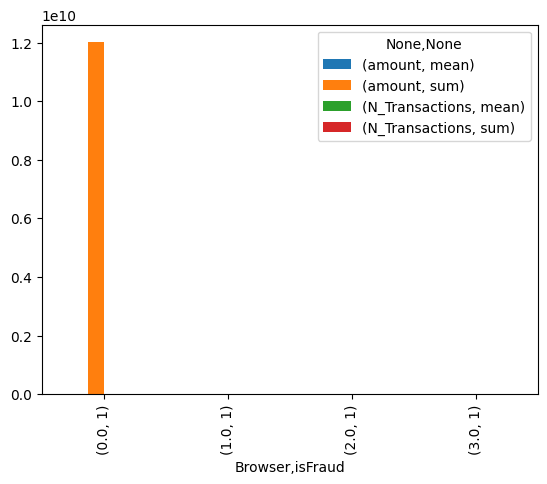

In [65]:
browsers.plot(kind='bar')
plt.show()

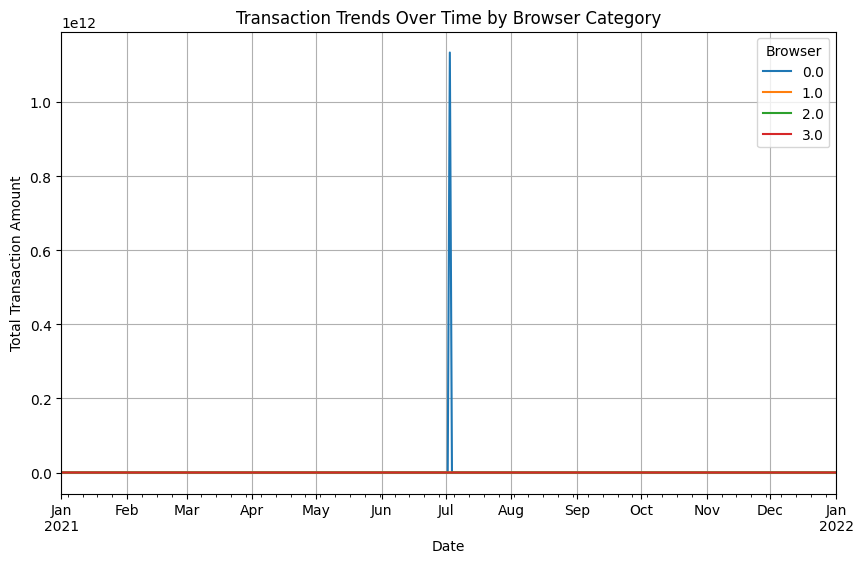

In [66]:
#Group data by Browser category and date
browser_groups= data.groupby(['Browser', 'Transaction_DATE'])
#calculate total transaction amounts per browser category per day
transaction_amounts= browser_groups['amount'].sum().unstack(level=0)

#plot transaction trends over time for each browser category
transaction_amounts.plot(kind='line', figsize=(10,6))
plt.title('Transaction Trends Over Time by Browser Category')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.legend(title='Browser')
plt.grid(True)
plt.show()

# Female Customers at the Age of 41 Who Conducted Fraud Transactions

In [67]:
#filter the original dataset for female customers at the age of 41 who conducted fraud transactions
fraudulent_customers= fraud_money_data[(fraud_money_data['Gender'] == 1) &
                                      (fraud_money_data['Age'] == 41) &
                                      (fraud_money_data['isFraud'] == 1)]
#Extract the customer_id and amount column
customer_ids= fraudulent_customers[['Customer_id', 'amount']]
#display the customer ids
print('Customer IDs of Female Customers at the Age of 41 Who Conducted Fraud Transactions: ')
customer_ids

Customer IDs of Female Customers at the Age of 41 Who Conducted Fraud Transactions: 


,Customer_id,amount
4442,508750.0,2930418.44
12180,516488.0,164.00
681,570128.0,20128.00
2302,570192.0,235238.66
4858,570296.0,120074.73
...,...,...
6362615,6869620.0,339682.13
6362616,6869621.0,6311409.28
6362617,6869622.0,6311409.28
6362618,6869623.0,850002.52


In [68]:
fraudulent_customers = fraud_money_data[fraud_money_data['isFraud'] == 1][['Customer_id', 'amount','Gender','Age']]
print("There are", len(fraudulent_customers), "numbers of Customers who did Fraud Transactions")
print("These are Customers who did Fraud Transactions:")
fraudulent_customers

There are 8213 numbers of Customers who did Fraud Transactions

These are Customers who did Fraud Transactions:


,Customer_id,amount,Gender,Age
2,504310.0,181.00,1.0,52.0
3,504311.0,181.00,0.0,29.0
251,504559.0,2806.00,1.0,39.0
252,504560.0,2806.00,1.0,47.0
680,504988.0,20128.00,1.0,32.0
...,...,...,...,...
6362615,6869620.0,339682.13,1.0,41.0
6362616,6869621.0,6311409.28,1.0,41.0
6362617,6869622.0,6311409.28,1.0,41.0
6362618,6869623.0,850002.52,1.0,41.0


# Fraud Root Causes and Solution

* Root Cause 1: Gender Disparity in Fraudulent Transactions

Observation: Females, particularly those unsubscribing to newsletters and within the 35-44 age group, exhibit a higher incidence of fraudulent transactions.

Solution:

Implement stricter verification protocols for high-risk transactions, potentially including age verification and confirmation steps for unsubscribed users.
Analyze the content of newsletters to see if educational content on fraud prevention could be incorporated, potentially reducing fraud among unsubscribed users.


* Root Cause 2: Payment Method Fraud

Observation: Different payment methods have varying fraud rates, with cards and transfers being the most susceptible. Cash-in and debit transactions show minimal to no fraud.

Solution:

Implement stronger authentication methods (e.g., multi-factor authentication) for transactions involving cards and transfers.
Consider offering incentives for using less fraud-prone methods like cash-in or debit for specific transaction types.


* Root Cause 3: Mobile App Dominance in Fraudulent Transactions

Observation: The mobile app is the most prevalent channel for fraudulent transactions.

Solution:

Enhance mobile app security measures, implement real-time monitoring for suspicious activities within the app, and enforce stricter authentication protocols for mobile transactions.

* Root Cause 4: Lack of Awareness (Newsletter Subscription)

Observation: Unsubscribed customers commit a significantly higher number of fraudulent transactions.

Solution:

Design educational campaigns within the platform (potentially through mandatory pop-ups or integrated tutorials) to educate users on fraud prevention practices.
Consider offering tiered benefits for subscribed users, potentially including features related to fraud protection or transaction monitoring.


# Outlier Detection

In [69]:
from sklearn.ensemble import IsolationForest

In [70]:
anomaly_data= data.copy()

In [71]:
anomaly_data['Transaction_MONTH']= anomaly_data['Transaction_DATE'].dt.month
anomaly_data['Transaction_DAY_OF_WEEK'] = anomaly_data['Transaction_DATE'].dt.dayofweek
anomaly_data.drop('Transaction_DATE', axis=1, inplace=True)
anomaly_data

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Browser,Time_Spent,Newsletter,type,amount,...,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Desttype_C,Desttype_M,Age_Groups,Transaction_MONTH,Transaction_DAY_OF_WEEK
0,504308.0,53.0,0.0,1.0,2.0,0.0,885.0,0.0,3,9839.64,...,160296.36,1979787155,0.00,0.00,0,False,True,45-54,6,1
1,504309.0,18.0,1.0,2.0,3.0,0.0,656.0,0.0,3,1864.28,...,19384.72,2044282225,0.00,0.00,0,False,True,18-24,12,4
2,504310.0,52.0,1.0,0.0,1.0,0.0,761.0,1.0,4,181.00,...,0.00,553264065,0.00,0.00,1,True,False,45-54,3,6
3,504311.0,29.0,0.0,1.0,5.0,0.0,906.0,1.0,1,181.00,...,0.00,38997010,21182.00,0.00,1,True,False,25-34,10,0
4,504312.0,21.0,1.0,1.0,1.0,0.0,605.0,1.0,3,11668.14,...,29885.86,1230701703,0.00,0.00,0,False,True,18-24,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,6869620.0,41.0,1.0,1.0,4.0,0.0,599.0,0.0,1,339682.13,...,0.00,776919290,0.00,339682.13,1,True,False,35-44,7,5
6362616,6869621.0,41.0,1.0,1.0,4.0,0.0,599.0,0.0,4,6311409.28,...,0.00,1881841831,0.00,0.00,1,True,False,35-44,7,5
6362617,6869622.0,41.0,1.0,1.0,4.0,0.0,599.0,0.0,1,6311409.28,...,0.00,1365125890,68488.84,6379898.11,1,True,False,35-44,7,5
6362618,6869623.0,41.0,1.0,1.0,4.0,0.0,599.0,0.0,4,850002.52,...,0.00,2080388513,0.00,0.00,1,True,False,35-44,7,5


In [72]:
features= ['amount', 'N_Transactions','Transaction_MONTH','Transaction_DAY_OF_WEEK','Pay_Method', 'oldbalanceOrg','newbalanceOrig','type', 'Browser',
           'oldbalanceDest', 'newbalanceDest', 'Time_Spent']

In [73]:
X_train= anomaly_data[features]
X_train.head()

,amount,N_Transactions,Transaction_MONTH,Transaction_DAY_OF_WEEK,Pay_Method,oldbalanceOrg,newbalanceOrig,type,Browser,oldbalanceDest,newbalanceDest,Time_Spent
0,9839.64,2.0,6,1,1.0,170136.0,160296.36,3,0.0,0.0,0.0,885.0
1,1864.28,3.0,12,4,2.0,21249.0,19384.72,3,0.0,0.0,0.0,656.0
2,181.00,1.0,3,6,0.0,181.0,0.00,4,0.0,0.0,0.0,761.0
3,181.00,5.0,10,0,1.0,181.0,0.00,1,0.0,21182.0,0.0,906.0
4,11668.14,1.0,9,1,1.0,41554.0,29885.86,3,0.0,0.0,0.0,605.0


In [74]:
model_IsoF= IsolationForest(n_jobs=6, contamination='auto', random_state=42)
model_IsoF

IsolationForest(n_jobs=6, random_state=42)

In [75]:
model_IsoF.fit(X_train)

IsolationForest(n_jobs=6, random_state=42)

In [76]:
y_pred= model_IsoF.predict(X_train)
y_pred

array([-1,  1, -1, ..., -1,  1, -1])

In [77]:
pd.value_counts(y_pred)

 1    5920099
-1     442521
Name: count, dtype: int64

In [78]:
X_train.loc[y_pred==1, :] #Inliers 

,amount,N_Transactions,Transaction_MONTH,Transaction_DAY_OF_WEEK,Pay_Method,oldbalanceOrg,newbalanceOrig,type,Browser,oldbalanceDest,newbalanceDest,Time_Spent
1,1864.28,3.0,12,4,2.0,21249.00,19384.72,3,0.0,0.00,0.00,656.0
20,1373.43,1.0,7,5,0.0,13854.00,12480.57,3,0.0,0.00,0.00,474.0
25,6061.13,3.0,5,3,0.0,443.00,0.00,3,0.0,0.00,0.00,710.0
36,8603.42,7.0,5,4,0.0,253.00,0.00,3,0.0,0.00,0.00,496.0
38,7413.54,3.0,4,5,0.0,297689.58,290276.03,3,0.0,0.00,0.00,484.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362611,63416.99,4.0,7,5,1.0,63416.99,0.00,1,0.0,276433.18,339850.17,599.0
6362613,1258818.82,4.0,7,5,1.0,1258818.82,0.00,1,0.0,503464.50,1762283.33,599.0
6362614,339682.13,4.0,7,5,1.0,339682.13,0.00,4,0.0,0.00,0.00,599.0
6362615,339682.13,4.0,7,5,1.0,339682.13,0.00,1,0.0,0.00,339682.13,599.0


In [79]:
X_train.loc[y_pred==-1, :] #Outliers 

,amount,N_Transactions,Transaction_MONTH,Transaction_DAY_OF_WEEK,Pay_Method,oldbalanceOrg,newbalanceOrig,type,Browser,oldbalanceDest,newbalanceDest,Time_Spent
0,9839.64,2.0,6,1,1.0,170136.00,160296.36,3,0.0,0.00,0.00,885.0
2,181.00,1.0,3,6,0.0,181.00,0.00,4,0.0,0.00,0.00,761.0
3,181.00,5.0,10,0,1.0,181.00,0.00,1,0.0,21182.00,0.00,906.0
4,11668.14,1.0,9,1,1.0,41554.00,29885.86,3,0.0,0.00,0.00,605.0
5,7817.71,6.0,5,4,1.0,53860.00,46042.29,3,1.0,0.00,0.00,364.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6362603,1819543.69,4.0,7,5,1.0,1819543.69,0.00,1,0.0,0.00,1819543.69,599.0
6362612,1258818.82,4.0,7,5,1.0,1258818.82,0.00,4,0.0,0.00,0.00,599.0
6362616,6311409.28,4.0,7,5,1.0,6311409.28,0.00,4,0.0,0.00,0.00,599.0
6362617,6311409.28,4.0,7,5,1.0,6311409.28,0.00,1,0.0,68488.84,6379898.11,599.0


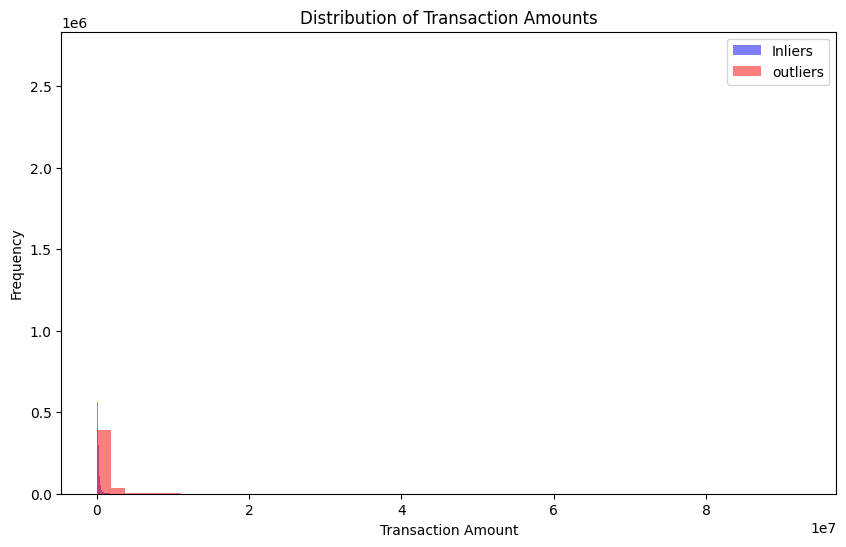

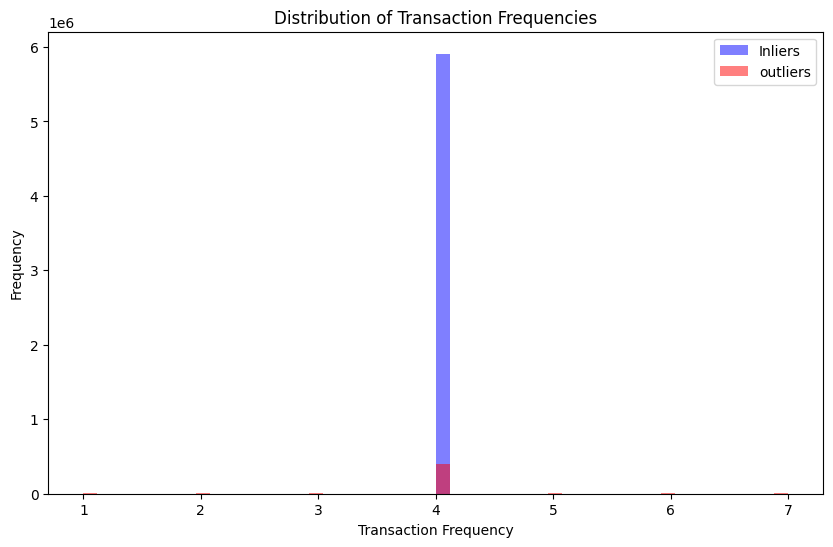

In [80]:
#select inliers and outliers from x_train based on y_pred
inliers= X_train.loc[y_pred == 1, :]
outliers= X_train.loc[y_pred == -1, :]

#Visualizing inliers and outliers in transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(inliers['amount'], bins=50, color='blue', alpha=0.5, label='Inliers')
plt.hist(outliers['amount'], bins=50, color='red', alpha=0.5, label='outliers')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.legend()
plt.show()

#Visualizing inliers and outliers in Transaction Frequencies
plt.figure(figsize=(10,6))
plt.hist(inliers['N_Transactions'], bins=50, color='blue', alpha=0.5, label='Inliers')
plt.hist(outliers['N_Transactions'], bins=50, color='red', alpha=0.5, label='outliers')
plt.xlabel('Transaction Frequency')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Frequencies')
plt.legend()
plt.show()

# Machine Learning Algorithms and Model Evaluation

In [81]:
corr_data= data.copy() # a copy of the original dataset
corr_data.drop('Age_Groups', axis=1, inplace=True)
corr_data.head()

,Customer_id,Age,Gender,Pay_Method,N_Transactions,Transaction_DATE,Browser,Time_Spent,Newsletter,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,Desttype_C,Desttype_M
0,504308.0,53.0,0.0,1.0,2.0,2021-06-22,0.0,885.0,0.0,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0,False,True
1,504309.0,18.0,1.0,2.0,3.0,2021-12-10,0.0,656.0,0.0,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0,False,True
2,504310.0,52.0,1.0,0.0,1.0,2021-03-14,0.0,761.0,1.0,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,1,True,False
3,504311.0,29.0,0.0,1.0,5.0,2021-10-25,0.0,906.0,1.0,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,1,True,False
4,504312.0,21.0,1.0,1.0,1.0,2021-09-14,0.0,605.0,1.0,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0,False,True


In [82]:
corr_data.corr()['isFraud'].sort_values(ascending=False)

isFraud             1.000000
amount              0.076688
Desttype_C          0.025697
type                0.020833
Customer_id         0.020820
oldbalanceOrg       0.010154
Pay_Method          0.000853
Browser             0.000729
newbalanceDest      0.000535
nameOrig            0.000470
N_Transactions      0.000227
Newsletter          0.000080
Age                 0.000034
Time_Spent         -0.000052
nameDest           -0.000141
Transaction_DATE   -0.000349
Gender             -0.000936
oldbalanceDest     -0.005885
newbalanceOrig     -0.008148
Desttype_M         -0.025697
Name: isFraud, dtype: float64

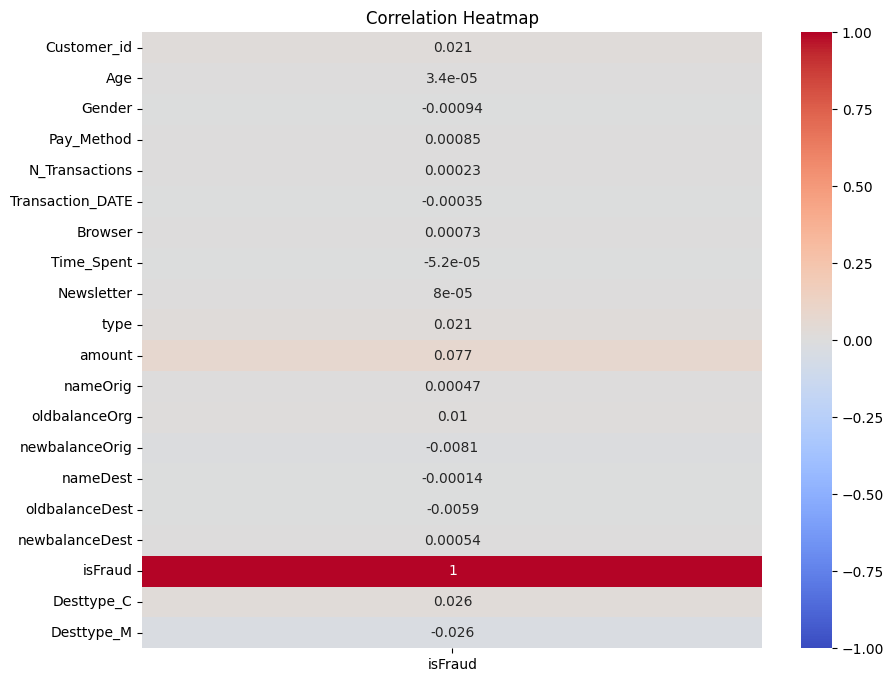

In [83]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_data.corr()[['isFraud']], annot=True, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [85]:
X= data[['amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceOrig', 'Pay_Method', 'Desttype_C','type', 'Browser', 'Desttype_M']]
y= data['isFraud']

In [86]:
X= StandardScaler().fit_transform(X)

In [87]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=19)

print("X_train Dataset: ", X_train.shape)
print("y_train Dataset: ", y_train.shape)
print("X_test Dataset: ", X_test.shape)
print("y_test Dataset: ", y_test.shape)

X_train Dataset:  (4453834, 9)

y_train Dataset:  (4453834,)

X_test Dataset:  (1908786, 9)

y_test Dataset:  (1908786,)


In [88]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm= SMOTE(random_state=9)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After OverSampling, the shape of train_X: {}".format(X_train_res.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 5765

Before OverSampling, counts of label '0': 4448069 



After OverSampling, the shape of train_X: (8896138, 9)

After OverSampling, the shape of train_y: (8896138,) 



After OverSampling, counts of label '1': 4448069

After OverSampling, counts of label '0': 4448069


In [89]:
from sklearn.metrics import classification_report
lr= LogisticRegression()
lr.fit(X_train_res, y_train_res.ravel())
lr_y_pred= lr.predict_proba(X_test)
lr_y_labels= lr_y_pred.argmax(axis=1)
cm_lr= confusion_matrix(y_test, lr_y_labels)
print("Confusion Matrix: ")
print(cm_lr)

print('Clssification Report: ')
print(classification_report(y_test, lr_y_labels))


Confusion Matrix: 

[[1812324   94014]

 [    161    2287]]

Clssification Report: 

              precision    recall  f1-score   support



           0       1.00      0.95      0.97   1906338

           1       0.02      0.93      0.05      2448



    accuracy                           0.95   1908786

   macro avg       0.51      0.94      0.51   1908786

weighted avg       1.00      0.95      0.97   1908786




In [90]:
sgdc=SGDClassifier(loss='log', random_state=42)
sgdc.fit(X_train_res, y_train_res.ravel())
sgdc_y_pred= sgdc.predict_proba(X_test)
sgdc_y_labels= sgdc_y_pred.argmax(axis=1)
cm_sgdc= confusion_matrix(y_test, sgdc_y_labels)
print("Confusion Matrix: ")
print(cm_sgdc)

print('Clssification Report: ')
print(classification_report(y_test, sgdc_y_labels))


Confusion Matrix: 

[[1788790  117548]

 [    330    2118]]

Clssification Report: 

              precision    recall  f1-score   support



           0       1.00      0.94      0.97   1906338

           1       0.02      0.87      0.03      2448



    accuracy                           0.94   1908786

   macro avg       0.51      0.90      0.50   1908786

weighted avg       1.00      0.94      0.97   1908786




In [91]:
xgb=XGBClassifier(n_estimators=500, n_jobs=-1, verbose=1,learning_rate=0.05, max_depth=4, subsample=0.8)
xgb.fit(X_train_res, y_train_res.ravel())
xgb_y_pred= xgb.predict_proba(X_test)
xgb_y_labels= xgb_y_pred.argmax(axis=1)
cm_xgb= confusion_matrix(y_test, xgb_y_labels)
print("Confusion Matrix: ")
print(cm_xgb)

print('Clssification Report: ')
print(classification_report(y_test, xgb_y_labels))


Confusion Matrix: 

[[1893734   12604]

 [      9    2439]]

Clssification Report: 

              precision    recall  f1-score   support



           0       1.00      0.99      1.00   1906338

           1       0.16      1.00      0.28      2448



    accuracy                           0.99   1908786

   macro avg       0.58      0.99      0.64   1908786

weighted avg       1.00      0.99      1.00   1908786




In [92]:
rfc=RandomForestClassifier(n_estimators=100,n_jobs=-1,verbose=1, random_state=9)
rfc.fit(X_train_res, y_train_res.ravel())
rfc_y_pred= rfc.predict_proba(X_test)
rfc_y_labels= rfc_y_pred.argmax(axis=1)
cm_rfc= confusion_matrix(y_test, rfc_y_labels)
print("Confusion Matrix: ")
print(cm_rfc)

print('Clssification Report: ')
print(classification_report(y_test, rfc_y_labels))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.9min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.0min finished

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.7s

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.1s finished


Confusion Matrix: 

[[1904839    1499]

 [     62    2386]]

Clssification Report: 

              precision    recall  f1-score   support



           0       1.00      1.00      1.00   1906338

           1       0.61      0.97      0.75      2448



    accuracy                           1.00   1908786

   macro avg       0.81      0.99      0.88   1908786

weighted avg       1.00      1.00      1.00   1908786




In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
model_labels= ['Logistic Regression', 'SGDClassifier', 'XGBClassifier', 'RandomForestClassifier']
model1= LogisticRegression()
model2= SGDClassifier(loss='log', random_state=42)
model3= XGBClassifier(n_estimators=500, n_jobs=-1, verbose=1,learning_rate=0.05, max_depth=4, subsample=0.8)
model4= RandomForestClassifier(n_estimators=100,n_jobs=-1,verbose=1, random_state=9)

In [94]:
voting= VotingClassifier(
estimators=[
    (model_labels[0], model1),
    (model_labels[1], model2),
    (model_labels[2], model3),
    (model_labels[3], model4)
], voting='soft'
)

In [95]:
models_new= ['Logistic Regression', 'SGDClassifier', 'XGBClassifier', 'RandomForestClassifier', 'VotingClassifier_soft']
for model, models in zip([model1, model2, model3, model4, voting], models_new):
    scores= model_selection.cross_val_score(model, X_train_res, y_train_res.ravel(), cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), models))

Accuracy: 0.94 (+/- 0.00) [Logistic Regression]

Accuracy: 0.91 (+/- 0.00) [SGDClassifier]

Accuracy: 1.00 (+/- 0.00) [XGBClassifier]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.6min finished

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.8s finished

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.0min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.7min finished

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.7s

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    8.2s finished

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5

Accuracy: 1.00 (+/- 0.00) [RandomForestClassifier]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  5.9min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.6min finished

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.8s finished

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.1min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 13.9min finished

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    3.5s

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    7.9s finished

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6

Accuracy: 1.00 (+/- 0.00) [VotingClassifier_soft]


In [99]:
voting.fit(X_train_res, y_train_res.ravel())
voting_y_pred= voting.predict(X_test)
cm_voting= confusion_matrix(y_test, voting_y_pred)
print("Confusion Matrix: ")
print(cm_voting)

print('Clssification Report: ')
print(classification_report(y_test, voting_y_pred))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.0min

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.3min finished

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.8s

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    6.1s finished


Confusion Matrix: 

[[1898605    7733]

 [     14    2434]]

Clssification Report: 

              precision    recall  f1-score   support



           0       1.00      1.00      1.00   1906338

           1       0.24      0.99      0.39      2448



    accuracy                           1.00   1908786

   macro avg       0.62      1.00      0.69   1908786

weighted avg       1.00      1.00      1.00   1908786




# Comparative Evaluation of Machine Learning Models for Fraud Detection with Random Forest Classifier as the Top Performer

Among all models, the Random Forest Classifier emerged as the top-performing model for fraud detection,surpassing even the Soft Voting Classifier. It achieved high accuracy in predicting non-fraudulent transactions (class 0), with a precision,recall, and F1-score of 1.00. This indicates that almost all non-fraudulent transactions were correctly classified. However, for detecting fraudulent transactions (class 1), the model's performance is slightly lower. While the precision for detecting fraud is 0.61, suggesting that about 61% of the predicted fraud cases were accurate, the recall (true positive rate) is notebly higher at 0.97, indicating that the model managed to capture a high proportion of actual fraud cases. The F1-score, which balances precision and recall, is 0.75 for fraud detection. Overall, the model demonstrates strong performance in identifying non-fraudulent transactions while also showing reasonable effectiveness in identifying fraudulent ones.

In this case, the confusion matrix reveals that the model correctly classified the vast majority of non-fraudulent transactions (class 0), with 1,904,839 true negatives (TN) and only 1,499 false positives (FP). This indicates a high level of precision in identifying non-fraudulent cases. However, in detecting fraudulent transactions (class 1), the model exhibited a higher number of false negatives (FN) with 62 misclassified cases, but it captures a substantial portion of true positives (TP) with 2,386 correctly cases. This reflected in the higher recall for fraud detection.

# Summary:

This analysis identified concerning trends in fraudulent activity within the company. Here's a breakdown of the key findings and recommended solutions:

* Fraud Trends:

An increased risk of fraud is associated with:
Female users, particularly those unsubscribing to newsletters and within the 35-44 age group.
Transactions using cards and transfers, especially through the mobile app.
Users lacking awareness of fraud prevention practices (unsubscribed customers).

* Solutions:

Implement stricter verification protocols for high-risk transactions, potentially including age verification and confirmation steps for unsubscribed users.
Strengthen authentication methods (e.g., multi-factor authentication) for transactions involving cards and transfers.
Design educational campaigns within the platform to educate users on fraud prevention.
Consider tiered benefits for subscribed users related to fraud protection or transaction monitoring.

* Additionally:

The Random Forest Classifier emerged as the top model for fraud detection, excelling at identifying non-fraudulent transactions but performing well in detecting fraudulent ones too.
The model struggles with a small number of false negatives (missed fraud cases) but captures a high volume of actual fraud.

Moving Forward:

Continuously monitor and refine fraud detection models.
Investigate the specific types of fraud and geographical distribution to develop targeted mitigation strategies.
By implementing these recommendations and leveraging the Random Forest Classifier, the company can significantly bolster its fraud prevention efforts and create a more secure environment for the users.

